<a href="https://colab.research.google.com/github/sachchit-k/Ensemble_project/blob/main/ensemble_techniques_project_with_data_analysis_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ensemble Techniques Project With  DATA ANALYSIS 

### Report is published on : 




## Steps involved:
###Data analysis part

1. Loading the dataset
2. univariate & bivariate analysis :
  
  identifying the structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset.
3. Determining basic statistics such as central values, spread, tails, relationships between variables etc. 

###Model bulding part

4. Splitting the dataset into training and test set in the ratio of 70:30 (Training:Test)
5. Preparing the data for training - Scale the data, get rid of missing values
6. Train standard classification algorithms - Logistic Regression, Naive Bayes’, SVM, k-NN etc.
7. Training a meta-classifier and noting the accuracy of test data
8. Training standard Ensemble model - Random forest, Bagging, Boosting etc, and note the accuracy 
9. Comparing all the models.

###1.Loading and Understading the dataset



In [ ]:
#libraries
import numpy                            as np                       
import pandas                           as pd                       
import seaborn                          as sns                       # For Data Visualization 
import matplotlib.pyplot                as plt                     
import warnings                                                     

# add graphs into jupiter notebook
%matplotlib inline                             
warnings.filterwarnings('ignore')                                   
import statsmodels.api                  as sm                        
from sklearn import model_selection                                  
from sklearn.model_selection            import train_test_split     
from sklearn import metrics                                          
from sklearn.metrics                    import confusion_matrix,f1_score,accuracy_score,classification_report,roc_curve,auc,average_precision_score
from sklearn.linear_model               import LogisticRegression   
from sklearn.naive_bayes                import GaussianNB            
from sklearn.neighbors                  import KNeighborsClassifier 
from sklearn.svm                        import SVC                   

## Scaling
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

###Load DataSet :



In [ ]:
pdDataOrg = pd.read_csv("/content/Parkinsson disease.csv") 

In [ ]:
pdDataOrg.head()   

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [ ]:
pdData = pdDataOrg.copy()                                               # creating a copy of loanDataOrg into loanData

targetCol = 'status'                                                    # defining target column
targetColDf = pdData.pop(targetCol)                                     # popping target column from loanData df
pdData.insert(len(pdData.columns),targetCol, targetColDf)               # inserting target column to last column

# deleting variables that were used for changing column position of target column
del targetCol 
del targetColDf

# converting column names into lower case
pdData.columns = [c.lower() for c in pdData.columns]
# replacing spaces in column names with '_'
pdData.columns = [c.replace(' ', '_') for c in pdData.columns]
# replacing ':' in column names with '_'
pdData.columns = [c.replace(':', '_') for c in pdData.columns]
# replacing '(' in column names with '_'
pdData.columns = [c.replace('(', '_') for c in pdData.columns]
# replacing ')' in column names with '' i.e blank
pdData.columns = [c.replace(')', '') for c in pdData.columns]
# replacing '%' in column names with 'in_percent'
pdData.columns = [c.replace('%', 'in_percent') for c in pdData.columns]

# to check the above printing top 5 rows
pdData.head()

name  mdvp_fo_hz  mdvp_fhi_hz  mdvp_flo_hz  \
0  phon_R01_S01_1     119.992      157.302       74.997   
1  phon_R01_S01_2     122.400      148.650      113.819   
2  phon_R01_S01_3     116.682      131.111      111.555   
3  phon_R01_S01_4     116.676      137.871      111.366   
4  phon_R01_S01_5     116.014      141.781      110.655   

   mdvp_jitter_in_percent  mdvp_jitter_abs  mdvp_rap  mdvp_ppq  jitter_ddp  \
0                 0.00784          0.00007   0.00370   0.00554     0.01109   
1                 0.00968          0.00008   0.00465   0.00696     0.01394   
2                 0.01050          0.00009   0.00544   0.00781     0.01633   
3                 0.00997          0.00009   0.00502   0.00698     0.01505   
4                 0.01284          0.00011   0.00655   0.00908     0.01966   

   mdvp_shimmer  ...  shimmer_dda      nhr     hnr      rpde       dfa  \
0       0.04374  ...      0.06545  0.02211  21.033  0.414783  0.815285   
1       0.06134  ...      0.09403  0.01929  19.085  0.458359  0.819521   
2       0.05233  ...      0.08270  0.01309  20.651  0.429895  0.825288   
3       0.05492  ...      0.08771  0.01353  20.644  0.434969  0.819235   
4       0.06425  ...      0.10470  0.01767  19.649  0.417356  0.823484   

    spread1   spread2        d2       ppe  status  
0 -4.813031  0.266482  2.301442  0.284654       1  
1 -4.075192  0.335590  2.486855  0.368674       1  
2 -4.443179  0.311173  2.342259  0.332634       1  
3 -4.117501  0.334147  2.405554  0.368975       1  
4 -3.747787  0.234513  2.332180  0.410335       1  

[5 rows x 24 columns]

In [ ]:
'''

Attribute Information:

name - ASCII subject name and recording number
mdvp_fo_hz - Average vocal fundamental frequency (Actualy column name MDVP:Fo(Hz) )
mdvp_fhi_hz - Maximum vocal fundamental frequency (Actualy column name MDVP:Fhi(Hz) )
mdvp_flo_hz - Minimum vocal fundamental frequency (Actualy column name MDVP:Flo(Hz) )
mdvp_jitter_in_percent, mdvp_jitter_abs, mdvp_rap, mdvp_ppq, jitter_ddp - Several measures of variation in fundamental frequency (Actualy column names MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP respectively)
mdvp_shimmer, mdvp_shimmer_db, shimmer_apq3, shimmer_apq5, mdvp_apq, shimmer_dda - Several measures of variation in amplitude (Actualy column names MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA respectively)
nhr, hnr - Two measures of ratio of noise to tonal components in the voice (Actualy column names NHR, HNR respectively)
rpde, d2 - Two nonlinear dynamical complexity measures (Actualy column names RPDE, D2 respectively)
dfa - Signal fractal scaling exponent (Actualy column name DFA )
spread1, spread2, ppe - Three nonlinear measures of fundamental frequency variation (Actualy column names spread1, spread2, PPE respectively)
status - Health status of the subject (one) - Parkinson's, (zero) - healthy (Target Varibale / attribute)


'''

"\n\nAttribute Information:\n\nname - ASCII subject name and recording number\nmdvp_fo_hz - Average vocal fundamental frequency (Actualy column name MDVP:Fo(Hz) )\nmdvp_fhi_hz - Maximum vocal fundamental frequency (Actualy column name MDVP:Fhi(Hz) )\nmdvp_flo_hz - Minimum vocal fundamental frequency (Actualy column name MDVP:Flo(Hz) )\nmdvp_jitter_in_percent, mdvp_jitter_abs, mdvp_rap, mdvp_ppq, jitter_ddp - Several measures of variation in fundamental frequency (Actualy column names MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP respectively)\nmdvp_shimmer, mdvp_shimmer_db, shimmer_apq3, shimmer_apq5, mdvp_apq, shimmer_dda - Several measures of variation in amplitude (Actualy column names MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA respectively)\nnhr, hnr - Two measures of ratio of noise to tonal components in the voice (Actualy column names NHR, HNR respectively)\nrpde, d2 - Two nonlinear dynamical complexity measures (Actualy c

In [ ]:
print('\033[1mThe Parkinson\'s disease dataset having "{0}" rows and "{1}" columns\033[0m.'.format(pdData.shape[0],pdData.shape[1]))

The Parkinson's disease dataset having "195" rows and "24" columns.


In [ ]:
pdData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    195 non-null    object 
 1   mdvp_fo_hz              195 non-null    float64
 2   mdvp_fhi_hz             195 non-null    float64
 3   mdvp_flo_hz             195 non-null    float64
 4   mdvp_jitter_in_percent  195 non-null    float64
 5   mdvp_jitter_abs         195 non-null    float64
 6   mdvp_rap                195 non-null    float64
 7   mdvp_ppq                195 non-null    float64
 8   jitter_ddp              195 non-null    float64
 9   mdvp_shimmer            195 non-null    float64
 10  mdvp_shimmer_db         195 non-null    float64
 11  shimmer_apq3            195 non-null    float64
 12  shimmer_apq5            195 non-null    float64
 13  mdvp_apq                195 non-null    float64
 14  shimmer_dda             195 non-null    fl

**As shown above, <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(a.) There are no missing values<br>and (b.) No duplicate rows in the given dataset**


In [ ]:
# Five point summary of each attribute
pdData.describe().T

count        mean        std         min         25%  \
mdvp_fo_hz              195.0  154.228641  41.390065   88.333000  117.572000   
mdvp_fhi_hz             195.0  197.104918  91.491548  102.145000  134.862500   
mdvp_flo_hz             195.0  116.324631  43.521413   65.476000   84.291000   
mdvp_jitter_in_percent  195.0    0.006220   0.004848    0.001680    0.003460   
mdvp_jitter_abs         195.0    0.000044   0.000035    0.000007    0.000020   
mdvp_rap                195.0    0.003306   0.002968    0.000680    0.001660   
mdvp_ppq                195.0    0.003446   0.002759    0.000920    0.001860   
jitter_ddp              195.0    0.009920   0.008903    0.002040    0.004985   
mdvp_shimmer            195.0    0.029709   0.018857    0.009540    0.016505   
mdvp_shimmer_db         195.0    0.282251   0.194877    0.085000    0.148500   
shimmer_apq3            195.0    0.015664   0.010153    0.004550    0.008245   
shimmer_apq5            195.0    0.017878   0.012024    0.005700    0.009580   
mdvp_apq                195.0    0.024081   0.016947    0.007190    0.013080   
shimmer_dda             195.0    0.046993   0.030459    0.013640    0.024735   
nhr                     195.0    0.024847   0.040418    0.000650    0.005925   
hnr                     195.0   21.885974   4.425764    8.441000   19.198000   
rpde                    195.0    0.498536   0.103942    0.256570    0.421306   
dfa                     195.0    0.718099   0.055336    0.574282    0.674758   
spread1                 195.0   -5.684397   1.090208   -7.964984   -6.450096   
spread2                 195.0    0.226510   0.083406    0.006274    0.174351   
d2                      195.0    2.381826   0.382799    1.423287    2.099125   
ppe                     195.0    0.206552   0.090119    0.044539    0.137451   
status                  195.0    0.753846   0.431878    0.000000    1.000000   

                               50%         75%         max  
mdvp_fo_hz              148.790000  182.769000  260.105000  
mdvp_fhi_hz             175.829000  224.205500  592.030000  
mdvp_flo_hz             104.315000  140.018500  239.170000  
mdvp_jitter_in_percent    0.004940    0.007365    0.033160  
mdvp_jitter_abs           0.000030    0.000060    0.000260  
mdvp_rap                  0.002500    0.003835    0.021440  
mdvp_ppq                  0.002690    0.003955    0.019580  
jitter_ddp                0.007490    0.011505    0.064330  
mdvp_shimmer              0.022970    0.037885    0.119080  
mdvp_shimmer_db           0.221000    0.350000    1.302000  
shimmer_apq3              0.012790    0.020265    0.056470  
shimmer_apq5              0.013470    0.022380    0.079400  
mdvp_apq                  0.018260    0.029400    0.137780  
shimmer_dda               0.038360    0.060795    0.169420  
nhr                       0.011660    0.025640    0.314820  
hnr                      22.085000   25.075500   33.047000  
rpde                      0.495954    0.587562    0.685151  
dfa                       0.722254    0.761881    0.825288  
spread1                  -5.720868   -5.046192   -2.434031  
spread2                   0.218885    0.279234    0.450493  
d2                        2.361532    2.636456    3.671155  
ppe                       0.194052    0.252980    0.527367  
status                    1.000000    1.000000    1.000000

###2. univariate & bivariate analysis :

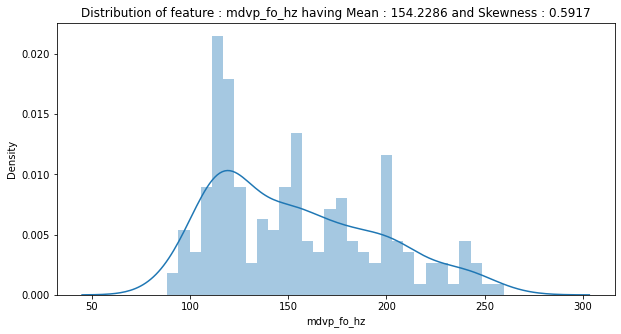

In [ ]:
##'mdvp_fo_hz' attribute : (MDVP:Fo(Hz) - Average vocal fundamental frequency )
feature = 'mdvp_fo_hz'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),4))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

**From above we can understand the following about Average vocal fundamental frequency (mdvp_fo_hz) attribute of the dataset:**
* Mean value of the attribute is 154.2286 with skewness of 0.5917, which shows that the datapoints of the attribute is slightly right / positive skewed.
* Maximum datapoints are ranging from 110 to 130 Hz.

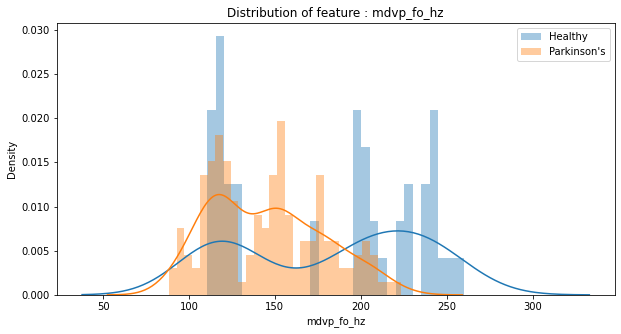

In [ ]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

**From the above we can observe that, most of the patients with Parkinson's disease have Average vocal fundamental frequency (mdvp_fo_hz) between 90 to 190 hz. Even though some of healthy patients have Average vocal fundamental frequency between 110-130 Hz and 170-180 Hz.**
* Lets bucket Average vocal fundamental frequency (mdvp_fo_hz) and check w.r.t the different status i.e Healthy or Parkinson's:

status                         0           1
mdvp_fo_hz                                  
mdvp_fo_hz : 50-100     0.000000  100.000000
mdvp_fo_hz : 100-150   19.565217   80.434783
mdvp_fo_hz : 150-200   11.475410   88.524590
mdvp_fo_hz : 200-250   65.625000   34.375000
mdvp_fo_hz : 250-300  100.000000    0.000000


Text(0.5, 1.0, 'PD status with different mdvp_fo_hz group')

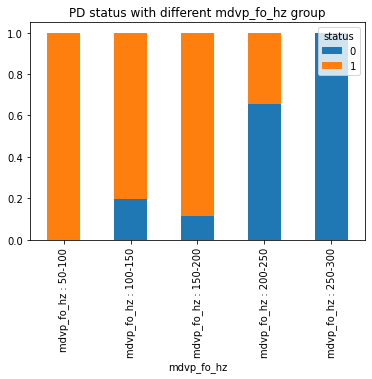

In [ ]:
bins = [50,100,150,200,250,300]                                         # defining mdvp_fo_hz bins,
# defining labels of mdvp_fo_hz groups as per bins defined as above
mdvp_fo_hz_group = ['mdvp_fo_hz : 50-100', 'mdvp_fo_hz : 100-150', 'mdvp_fo_hz : 150-200', 'mdvp_fo_hz : 200-250', 'mdvp_fo_hz : 250-300']
pdData_mdvp_fo_hz_bin = pd.cut(pdData.mdvp_fo_hz,bins,labels=mdvp_fo_hz_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to mdvp_fo_hz_group_col variable
mdvp_fo_hz_group_col = pd.crosstab(pdData_mdvp_fo_hz_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(mdvp_fo_hz_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
mdvp_fo_hz_group_col.div(mdvp_fo_hz_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different mdvp_fo_hz group")                     # setting title of the figure

- We can find out the following from the above crosstab:
    * **All the patient with Average vocal fundamental frequency (mdvp_fo_hz) group between 50-100 are having Parkinson's disease.**
    * **Average vocal fundamental frequency (mdvp_fo_hz) group between 150-200 having second higest Parkinson's patient with percentage of 88.525, followed by Average vocal fundamental frequency (mdvp_fo_hz) group between 100-150 having Parkinson's patient with percentage of 80.435 .**
    * **Average vocal fundamental frequency (mdvp_fo_hz) group between 200-250 having Healthy patient with percentage of 65.625 .**
    * **All the patient with Average vocal fundamental frequency (mdvp_fo_hz) group between 250-300 are Healthy.**
<br><br>


- Let's check outliers for the attribute :

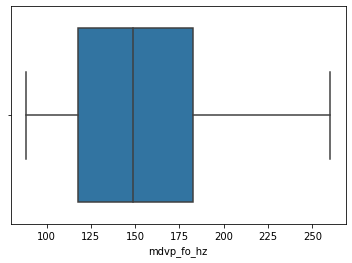

In [ ]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

<Axes: xlabel='status', ylabel='mdvp_fo_hz'>

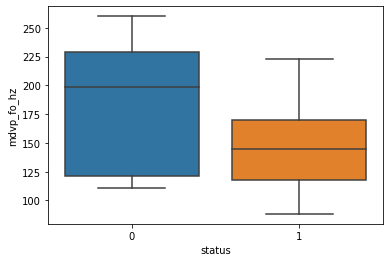

In [ ]:
sns.boxplot(x=pdData['status'],y=pdData[feature]) 

**There are no outliers presnt in the 'mdvp_fo_hz' feature / attribute as we can see from above boxplot.**

**it is observed there are no outliers present in mdvp_fo_hz attribute for different 'status' attributes.**

#### B. 'mdvp_fhi_hz' attribute : (MDVP:Fhi(Hz) - Maximum vocal fundamental frequency )

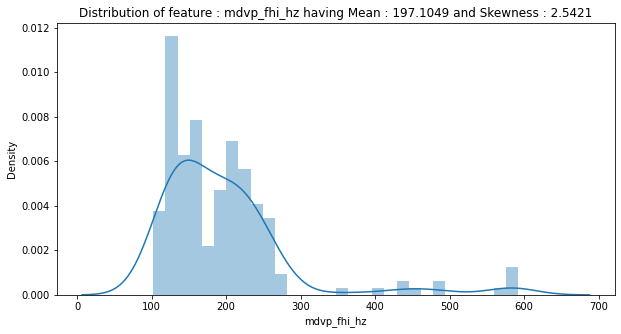

In [ ]:
feature = 'mdvp_fhi_hz'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),4))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

**From above we can understand the following about Maximum vocal fundamental frequency (mdvp_fhi_hz) attribute of the dataset:**
* Mean value of the attribute is 197.1049 with skewness of 2.5421, which shows that the datapoints of the attribute is highly right / positive skewed.
* Maximum datapoints are ranging from 100 to 260 Hz.

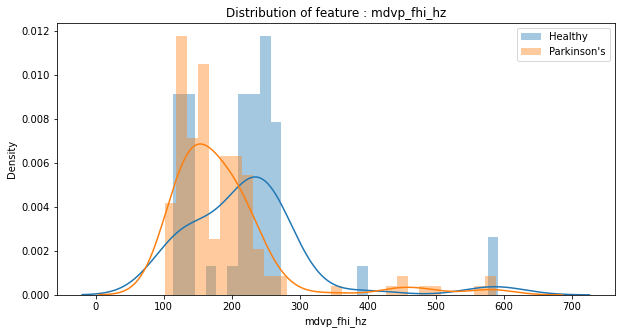

In [ ]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

**From the above we can observe that, most of the patients with Parkinson's disease have Maximum vocal fundamental frequency (mdvp_fhi_hz) between 100 to 210 hz.**
* Lets bucket Maximum vocal fundamental frequency (mdvp_fhi_hz) and check w.r.t the different status i.e Healthy or Parkinson's:

status                         0           1
mdvp_fhi_hz                                 
mdvp_fhi_hz : 100-200  12.931034   87.068966
mdvp_fhi_hz : 200-300  44.776119   55.223881
mdvp_fhi_hz : 300-400  50.000000   50.000000
mdvp_fhi_hz : 400-500   0.000000  100.000000
mdvp_fhi_hz : 500-600  40.000000   60.000000


Text(0.5, 1.0, 'PD status with different mdvp_fhi_hz group')

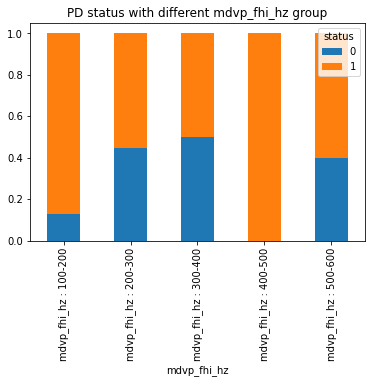

In [ ]:
bins = [100,200,300,400,500,600]                                         # defining mdvp_fhi_hz bins,
# defining labels of mdvp_fhi_hz groups as per bins defined as above
mdvp_fhi_hz_group = ['mdvp_fhi_hz : 100-200', 'mdvp_fhi_hz : 200-300', 'mdvp_fhi_hz : 300-400', 'mdvp_fhi_hz : 400-500',
                     'mdvp_fhi_hz : 500-600']
pdData_mdvp_fhi_hz_bin = pd.cut(pdData[feature],bins,labels=mdvp_fhi_hz_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to mdvp_fhi_hz_group_col variable
mdvp_fhi_hz_group_col = pd.crosstab(pdData_mdvp_fhi_hz_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(mdvp_fhi_hz_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
mdvp_fhi_hz_group_col.div(mdvp_fhi_hz_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different mdvp_fhi_hz group")                     # setting title of the figure

- We can find out the following from the above crosstab:
    * **All the patients with Maximum vocal fundamental frequency (mdvp_fhi_hz) group between 400-500 are having Parkinson's disease.**
    * **Maximum vocal fundamental frequency (mdvp_fhi_hz) group between 100-200 having second highest Parkinson's patient with percentage of 87.069, followed by Maximum vocal fundamental frequency (mdvp_fhi_hz) group between 500-600 having Parkinson's patient with percentage of 60.000 .**
    * **Maximum vocal fundamental frequency (mdvp_fhi_hz) group between 200-300 having Parkinson's patient with percentage of 55.224 .**
    * **Exactly half of the patients are from Maximum vocal fundamental frequency (mdvp_fhi_hz) group between 300-400 are Healthy.**
<br><br>
- Let's check outliers for the attribute :

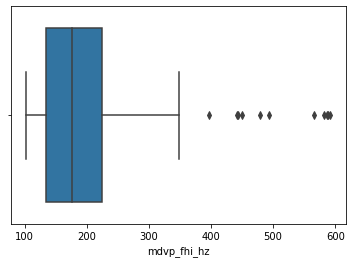

In [ ]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

**In the 'mdvp_fhi_hz' attribute some outliers are present, let's check for the same :**

In [ ]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),3),round(np.median(pdData[feature]),3),round(IQR,3))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature mdvp_fhi_hz : Mean = 197.105, Median = 175.829 and Inter-Quartile-Range (IQR) = 89.343

*****************************************************************************************************************************
There are 11 outliers (5.641 % of the data points) in mdvp_fhi_hz feature and the values are [588.518, 586.567, 492.892, 442.557, 450.247, 442.824, 479.697, 565.74, 592.03, 581.289, 396.961]
*****************************************************************************************************************************


* Now will check if any outliers present for different target attributes i.e 'status'

<Axes: xlabel='status', ylabel='mdvp_fhi_hz'>

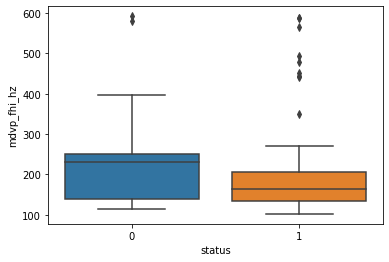

In [ ]:
sns.boxplot(x=pdData['status'],y=pdData[feature]) 

**From above, it is observed that for 'mdvp_fhi_hz' attribute patients with Parkinson's disease have more outliers than Healthy patients.**

#### C. 'mdvp_flo_hz' attribute : (MDVP:Flo(Hz) - Minimum vocal fundamental frequency )

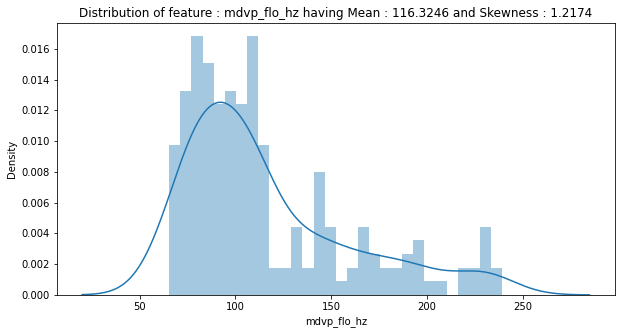

In [ ]:
feature = 'mdvp_flo_hz'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),4))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

**From above we can understand the following about Minimum vocal fundamental frequency (mdvp_flo_hz) attribute of the dataset:**
* Mean value of the attribute is 116.3246 with skewness of 1.2174, which shows that the datapoints of the attribute is highly right / positive skewed.
* Maximum datapoints are ranging from 65 to 120 Hz.

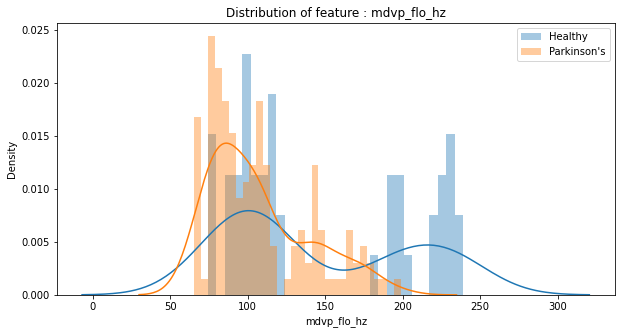

In [ ]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

**From the above we can observe that, most of the patients with Parkinson's disease have Minimum vocal fundamental frequency (mdvp_flo_hz) between 60 to 110 hz.**
* Lets bucket Minimum vocal fundamental frequency (mdvp_flo_hz) and check w.r.t the different status i.e Healthy or Parkinson's:

status                          0          1
mdvp_flo_hz                                 
mdvp_flo_hz : 50-100    16.853933  83.146067
mdvp_flo_hz : 100-150   20.000000  80.000000
mdvp_flo_hz : 150-200   29.166667  70.833333
mdvp_flo_hz : 200-250  100.000000   0.000000


Text(0.5, 1.0, 'PD status with different mdvp_flo_hz group')

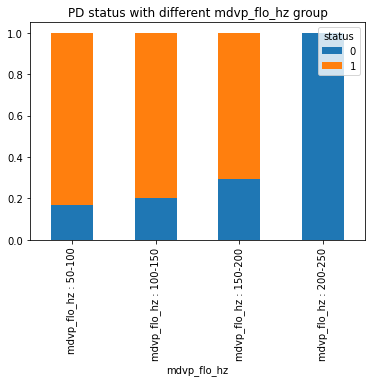

In [ ]:
bins = [50,100,150,200,250]                                         # defining mdvp_flo_hz bins,
# defining labels of mdvp_flo_hz groups as per bins defined as above
mdvp_flo_hz_group = ['mdvp_flo_hz : 50-100', 'mdvp_flo_hz : 100-150', 'mdvp_flo_hz : 150-200', 'mdvp_flo_hz : 200-250']
pdData_mdvp_flo_hz_bin = pd.cut(pdData[feature],bins,labels=mdvp_flo_hz_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to mdvp_flo_hz_group_col variable
mdvp_flo_hz_group_col = pd.crosstab(pdData_mdvp_flo_hz_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(mdvp_flo_hz_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
mdvp_flo_hz_group_col.div(mdvp_flo_hz_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different mdvp_flo_hz group")                     # setting title of the figure

- We can find out the following from the above crosstab:
    * **Minimum vocal fundamental frequency (mdvp_flo_hz) group between 50-100 are having highest Parkinson's patients with percentage of 83.146 .**
    * **Minimum vocal fundamental frequency (mdvp_flo_hz) group between 100-150 having second higest Parkinson's patient with percentage of 80.000, followed by Minimum vocal fundamental frequency (mdvp_flo_hz) group between 150-200 having Parkinson's patient with percentage of 70.833 .**
    * **All the patient from Minimum vocal fundamental frequency (mdvp_flo_hz) group between 200-250 are Healthy patient.**
<br><br>
- Let's check outliers for the attribute :

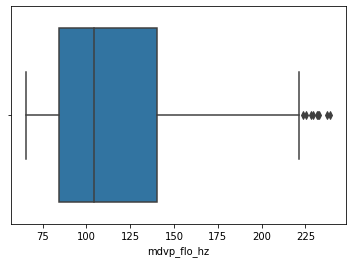

In [ ]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

**In the 'mdvp_flo_hz' attribute some outliers are present, let's check for the same :**

In [ ]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),3),round(np.median(pdData[feature]),3),round(IQR,3))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature mdvp_flo_hz : Mean = 116.325, Median = 104.315 and Inter-Quartile-Range (IQR) = 55.728

*****************************************************************************************************************************
There are 9 outliers (4.615 % of the data points) in mdvp_flo_hz feature and the values are [225.227, 232.483, 232.435, 227.911, 231.848, 223.634, 229.256, 237.303, 239.17]
*****************************************************************************************************************************


* Now will check if any outliers present for different target attributes i.e 'status'

<Axes: xlabel='status', ylabel='mdvp_flo_hz'>

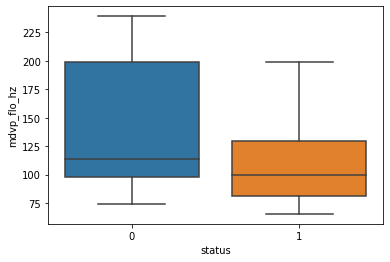

In [ ]:
sns.boxplot(x=pdData['status'],y=pdData[feature]) 

**From above, it is observed that for 'mdvp_flo_hz' attribute w.r.t different target attribute status i.e Healthy or Parkinson's there are no outliers but combining datapoints are having outliers. Reason for this is patients with Parkinson's disease have lower Minimum vocal fundamental frequency whereas Healthy patients have higher Minimum vocal fundamental frequency as we can deduce from the above boxplot.**

#### D. 'mdvp_jitter_in_percent' attribute : (MDVP:Jitter(%) - One of the measure of variation in fundamental frequency )

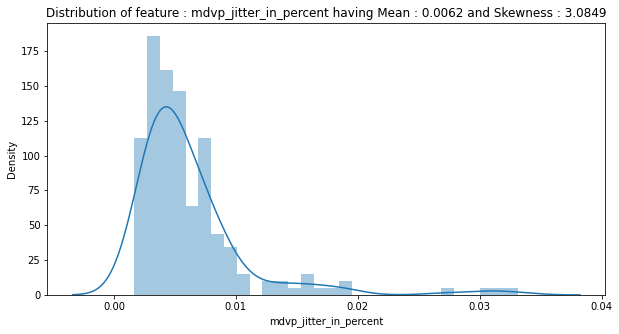

In [ ]:
feature = 'mdvp_jitter_in_percent'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),4))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

**From above we can understand the following about mdvp_jitter_in_percent (MDVP:Jitter(%)) attribute of the dataset:**
* Mean value of the attribute is 0.0062 with skewness of 3.0849, which shows that the datapoints of the attribute is highly right / positive skewed.
* Maximum datapoints are ranging from 0.001 to 0.007.

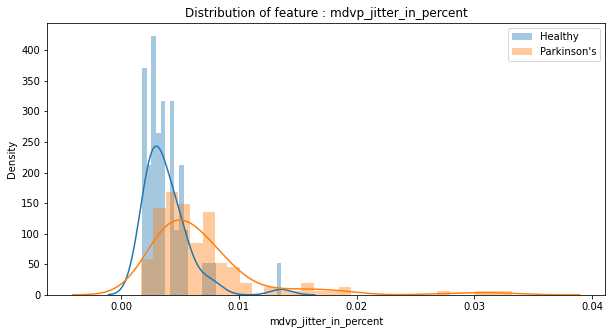

In [ ]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

**From the above we can observe that, patients with mdvp_jitter_in_percent (MDVP:Jitter(%)) values greater than 0.005 are more likly to have Parkinson's disease.**
* Lets bucket mdvp_jitter_in_percent (MDVP:Jitter(%)) and check w.r.t the different status i.e Healthy or Parkinson's:

status                          0           1
mdvp_jitter_in_percent                       
0.001-0.005             38.235294   61.764706
0.005-0.010             10.810811   89.189189
0.010-0.015             12.500000   87.500000
0.015-0.020              0.000000  100.000000
0.025-0.030              0.000000  100.000000
0.030-0.035              0.000000  100.000000


Text(0.5, 1.0, 'PD status with different mdvp_jitter_in_percent group')

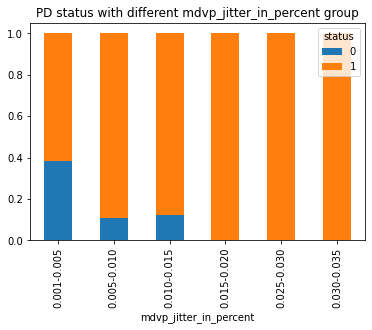

In [ ]:
bins = [0.001,0.005,0.010,0.015,0.020,0.025,0.030,0.035]                                         # defining mdvp_jitter_in_percent bins,
# defining labels of mdvp_jitter_in_percent groups as per bins defined as above
mdvp_jitter_in_percent_group = ['0.001-0.005', '0.005-0.010', '0.010-0.015', '0.015-0.020', '0.020-0.025', '0.025-0.030',
                                '0.030-0.035']
pdData_mdvp_jitter_in_percent_bin = pd.cut(pdData[feature],bins,labels=mdvp_jitter_in_percent_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to mdvp_jitter_in_percent_group_col variable
mdvp_jitter_in_percent_group_col = pd.crosstab(pdData_mdvp_jitter_in_percent_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(mdvp_jitter_in_percent_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
mdvp_jitter_in_percent_group_col.div(mdvp_jitter_in_percent_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different mdvp_jitter_in_percent group")                     # setting title of the figure

- We can find out the following from the above crosstab:
    * **All the patients under mdvp_jitter_in_percent (MDVP:Jitter(%)) groups ranging from 0.015 have Parkinson's disease.**
    * **mdvp_jitter_in_percent (MDVP:Jitter(%)) group between 0.005-0.010 having second higest Parkinson's patient with percentage of 89.189, followed by mdvp_jitter_in_percent (MDVP:Jitter(%)) group between 0.010-0.015 having Parkinson's patient with percentage of 87.500 .**
    * **mdvp_jitter_in_percent (MDVP:Jitter(%)) group between 0.001-0.005 having Parkinson's patient with percentage of 61.765 .**
<br><br>
- Let's check outliers for the attribute :

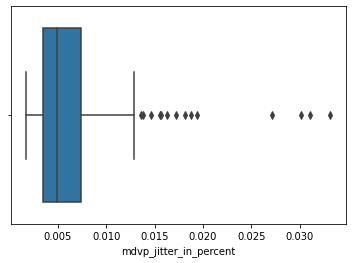

In [ ]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

**In the 'mdvp_jitter_in_percent' attribute some outliers are present, let's check for the same :**

In [ ]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),3),round(np.median(pdData[feature]),3),round(IQR,3))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature mdvp_jitter_in_percent : Mean = 0.006, Median = 0.005 and Inter-Quartile-Range (IQR) = 0.004

*****************************************************************************************************************************
There are 14 outliers (7.179 % of the data points) in mdvp_jitter_in_percent feature and the values are [0.01378, 0.01936, 0.03316, 0.01551, 0.03011, 0.01568, 0.01466, 0.01719, 0.01627, 0.01872, 0.03107, 0.02714, 0.01813, 0.0136]
*****************************************************************************************************************************


* Now we will check if any outliers present for different target attributes i.e 'status'

<Axes: xlabel='status', ylabel='mdvp_jitter_in_percent'>

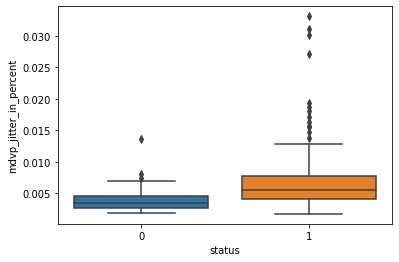

In [ ]:
sns.boxplot(x=pdData['status'],y=pdData[feature]) 

**From above, it is observed that for 'mdvp_jitter_in_percent' attribute patients with Parkinson's disease have more outliers than Healthy patients.**

#### E. 'mdvp_jitter_abs' attribute : (MDVP:Jitter(Abs) - One of the measure of variation in fundamental frequency )

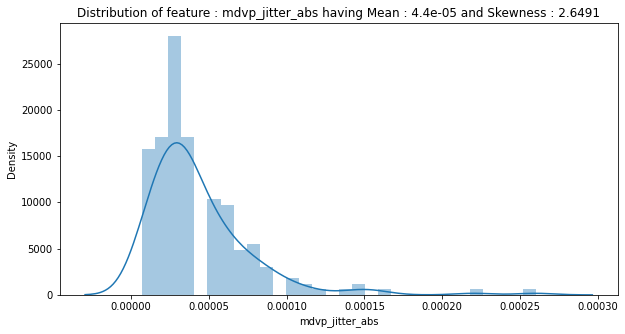

In [ ]:
feature = 'mdvp_jitter_abs'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

**From above we can understand the following about mdvp_jitter_abs (MDVP:Jitter(Abs)) attribute of the dataset:**
* Mean value of the attribute is 0.000044 with skewness of 2.6491, which shows that the datapoints of the attribute is highly right / positive skewed.
* Maximum datapoints are ranging from 0.00001 to 0.00004.

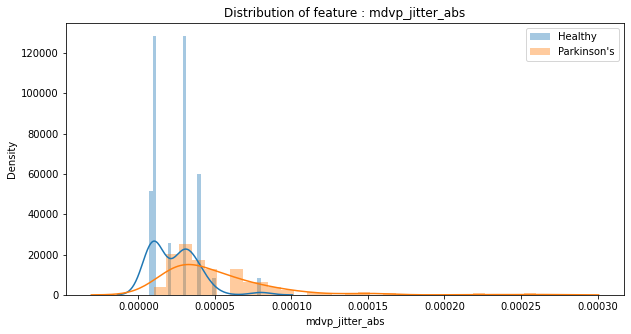

In [ ]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

**From the above we can observe that, patients with mdvp_jitter_abs (MDVP:Jitter(Abs)) values greater than 0.00002 are more likly to have Parkinson's disease.**
* Lets bucket mdvp_jitter_abs (MDVP:Jitter(Abs)) and check w.r.t the different status i.e Healthy or Parkinson's:

status                  0           1
mdvp_jitter_abs                      
0.00004-0.00010  3.448276   96.551724
0.00010-0.00015  0.000000  100.000000
0.00015-0.00020  0.000000  100.000000
0.00020-0.00026  0.000000  100.000000


Text(0.5, 1.0, 'PD status with different mdvp_jitter_abs group')

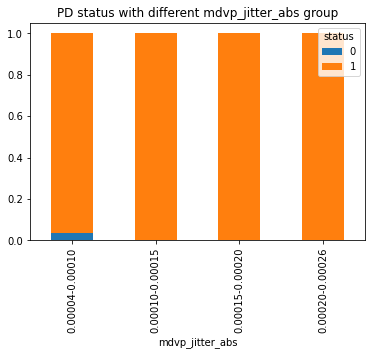

In [ ]:
bins = [0.00004,0.00010,0.00015,0.00020,0.00026]                                         # defining mdvp_jitter_abs bins,
# defining labels of mdvp_jitter_abs groups as per bins defined as above
mdvp_jitter_abs_group = ['0.00004-0.00010', '0.00010-0.00015', '0.00015-0.00020', '0.00020-0.00026']
pdData_mdvp_jitter_abs_bin = pd.cut(pdData[feature],bins,labels=mdvp_jitter_abs_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to mdvp_jitter_abs_group_col variable
mdvp_jitter_abs_group_col = pd.crosstab(pdData_mdvp_jitter_abs_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(mdvp_jitter_abs_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
mdvp_jitter_abs_group_col.div(mdvp_jitter_abs_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different mdvp_jitter_abs group")                     # setting title of the figure

- We can find out the following from the above crosstab:
    * **All the patients under mdvp_jitter_abs (MDVP:Jitter(Abs)) groups ranging more than 0.0001 have Parkinson's disease.**
    * **mdvp_jitter_abs (MDVP:Jitter(Abs)) group between 0.00004-0.00010 having Parkinson's patient with percentage of 96.552 .**
<br><br>
- Let's check outliers for the attribute :

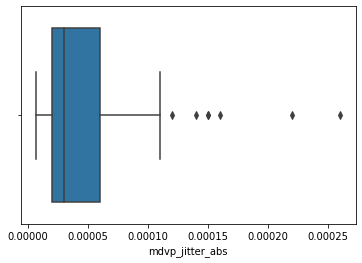

In [ ]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

**In the 'mdvp_jitter_abs' attribute some outliers are present, let's check for the same :**

In [ ]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature mdvp_jitter_abs : Mean = 4.4e-05, Median = 3e-05 and Inter-Quartile-Range (IQR) = 4e-05

*****************************************************************************************************************************
There are 7 outliers (3.59 % of the data points) in mdvp_jitter_abs feature and the values are [0.00015, 0.00026, 0.00012, 0.00022, 0.00016, 0.00014, 0.00015]
*****************************************************************************************************************************


* Now will check if any outliers present for different target attributes i.e 'status'

<Axes: xlabel='status', ylabel='mdvp_jitter_abs'>

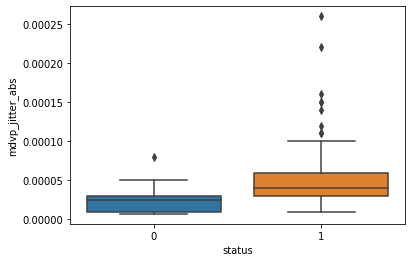

In [ ]:
sns.boxplot(x=pdData['status'],y=pdData[feature]) 

**From above, it is observed that for 'mdvp_jitter_abs' attribute patients with Parkinson's disease have more outliers than Healthy patients.**

#### F. 'mdvp_rap' attribute : (MDVP:RAP - One of the measure of variation in fundamental frequency )

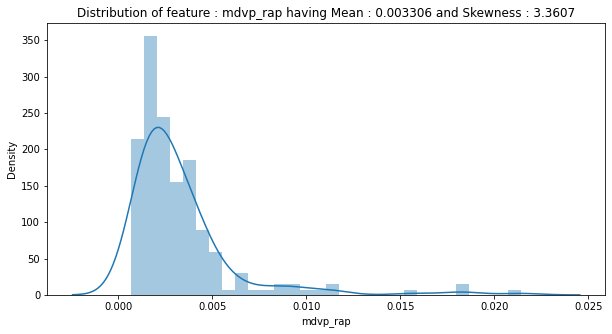

In [ ]:
feature = 'mdvp_rap'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

**From above we can understand the following about mdvp_rap (MDVP:RAP) attribute of the dataset:**
* Mean value of the attribute is 0.0033 with skewness of 3.3607, which shows that the datapoints of the attribute is highly right / positive skewed.
* Maximum datapoints are ranging from 0.001 to 0.004.

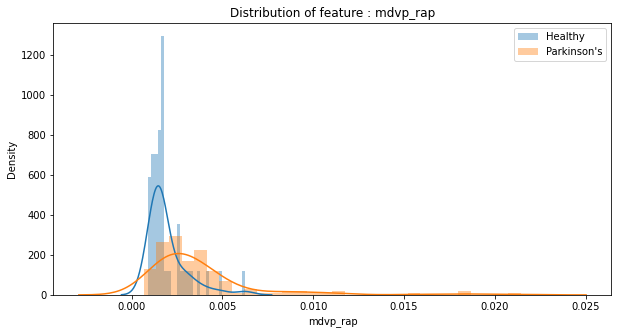

In [ ]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

**From the above we can observe that, patients with mdvp_rap (MDVP:RAP) values greater than 0.002 are more likly to have Parkinson's disease.**
* Lets bucket mdvp_rap (MDVP:RAP) and check w.r.t the different status i.e Healthy or Parkinson's:

status               0           1
mdvp_rap                          
0.000-0.005  27.647059   72.352941
0.005-.010    5.555556   94.444444
0.010-0.015   0.000000  100.000000
0.015-0.020   0.000000  100.000000
0.020-0.025   0.000000  100.000000


Text(0.5, 1.0, 'PD status with different mdvp_rap group')

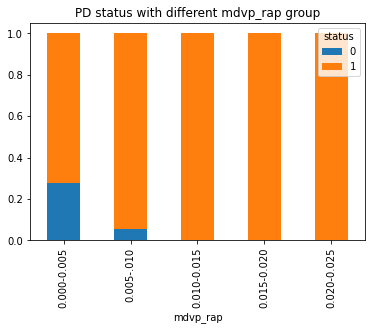

In [ ]:
bins = [0.000,0.005,0.010,0.015,0.020,0.025]                                         # defining mdvp_rap bins,
# defining labels of mdvp_rap groups as per bins defined as above
mdvp_rap_group = ['0.000-0.005', '0.005-.010', '0.010-0.015', '0.015-0.020', '0.020-0.025']
pdData_mdvp_rap_bin = pd.cut(pdData[feature],bins,labels=mdvp_rap_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to mdvp_rap_group_col variable
mdvp_rap_group_col = pd.crosstab(pdData_mdvp_rap_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(mdvp_rap_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
mdvp_rap_group_col.div(mdvp_rap_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different mdvp_rap group")                     # setting title of the figure

- We can find out the following from the above crosstab:
    * **All the patients under mdvp_rap (MDVP:RAP) groups ranging more than 0.01 have Parkinson's disease.**
    * **mdvp_rap (MDVP:RAP) group between 0.005-0.010 having Parkinson's patient with percentage of 94.444 followed by mdvp_rap (MDVP:RAP) group between 0.000-0.005 having Parkinson's patient with percentage of 72.353  .**
<br><br>
- Let's check outliers for the attribute :

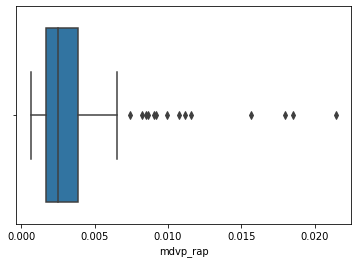

In [ ]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

**In the 'mdvp_rap' attribute some outliers are present, let's check for the same :**

In [ ]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature mdvp_rap : Mean = 0.003306, Median = 0.0025 and Inter-Quartile-Range (IQR) = 0.002175

*****************************************************************************************************************************
There are 14 outliers (7.179 % of the data points) in mdvp_rap feature and the values are [0.00743, 0.00826, 0.01159, 0.02144, 0.00905, 0.01854, 0.00863, 0.00849, 0.00996, 0.00919, 0.01075, 0.018, 0.01568, 0.01117]
*****************************************************************************************************************************


* Now will check if any outliers present for different target attributes i.e 'status'

<Axes: xlabel='status', ylabel='mdvp_rap'>

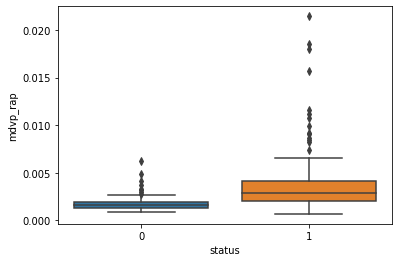

In [ ]:
sns.boxplot(x=pdData['status'],y=pdData[feature]) 

**From above, it is observed that for 'mdvp_rap' attribute patients with Parkinson's disease have more outliers than Healthy patients.**

#### G. 'mdvp_ppq' attribute : (MDVP:PPQ - One of the measure of variation in fundamental frequency )

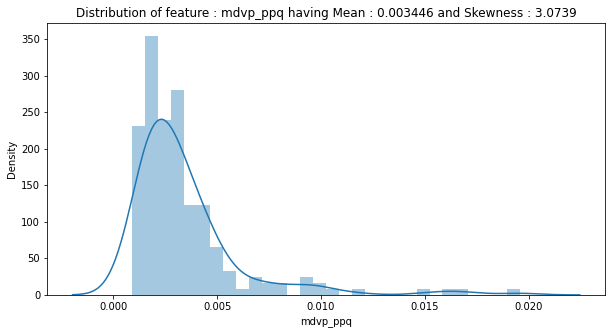

In [ ]:
feature = 'mdvp_ppq'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

**From above we can understand the following about mdvp_ppq (MDVP:PPQ) attribute of the dataset:**
* Mean value of the attribute is 0.0034 with skewness of 3.0739, which shows that the datapoints of the attribute is highly right / positive skewed.
* Maximum datapoints are ranging from 0.0010 to 0.0025.

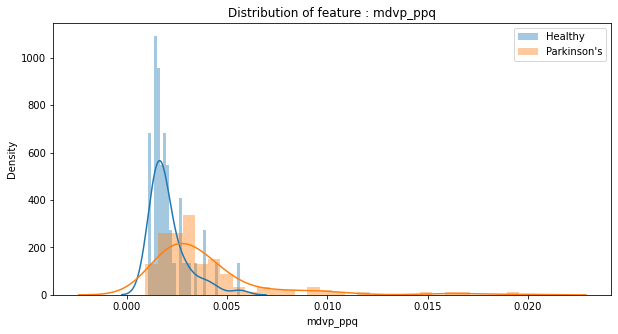

In [ ]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

**From the above we can observe that, patients with mdvp_ppq (MDVP:PPQ) values greater than 0.0025 are more likly to have Parkinson's disease.**
* Lets bucket mdvp_ppq (MDVP:PPQ) and check w.r.t the different status i.e Healthy or Parkinson's:

status               0           1
mdvp_ppq                          
0.000-0.005  27.647059   72.352941
0.005-.010    5.263158   94.736842
0.010-0.015   0.000000  100.000000
0.015-0.020   0.000000  100.000000


Text(0.5, 1.0, 'PD status with different mdvp_ppq group')

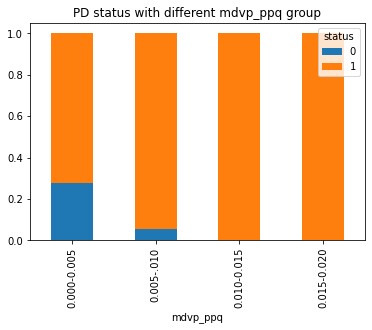

In [ ]:
bins = [0.000,0.005,0.010,0.015,0.020]                                         # defining mdvp_ppq bins,
# defining labels of mdvp_ppq groups as per bins defined as above
mdvp_ppq_group = ['0.000-0.005', '0.005-.010', '0.010-0.015', '0.015-0.020']
pdData_mdvp_ppq_bin = pd.cut(pdData[feature],bins,labels=mdvp_ppq_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to mdvp_ppq_group_col variable
mdvp_ppq_group_col = pd.crosstab(pdData_mdvp_ppq_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(mdvp_ppq_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
mdvp_ppq_group_col.div(mdvp_ppq_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different mdvp_ppq group")                     # setting title of the figure

- We can find out the following from the above crosstab:
    * **All the patients under mdvp_ppq (MDVP:PPQ) groups ranging more than 0.01 have Parkinson's disease.**
    * **mdvp_ppq (MDVP:PPQ) group between 0.005-0.010 having Parkinson's patient with percentage of 94.737 followed by mdvp_ppq (MDVP:PPQ) group between 0.000-0.005 having Parkinson's patient with percentage of 72.353, suprisingly which is exactly same for the same group of mdvp_rap (MDVP:RAP) attribute.**
<br><br>
- Let's check outliers for the attribute :

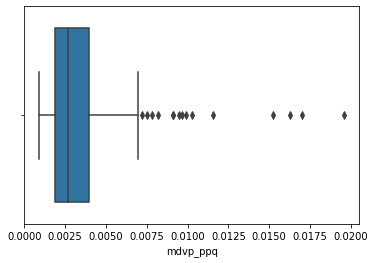

In [ ]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

**In the 'mdvp_ppq' attribute some outliers are present, let's check for the same :**

In [ ]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature mdvp_ppq : Mean = 0.003446, Median = 0.00269 and Inter-Quartile-Range (IQR) = 0.002095

*****************************************************************************************************************************
There are 15 outliers (7.692 % of the data points) in mdvp_ppq feature and the values are [0.00781, 0.00908, 0.0075, 0.0099, 0.01522, 0.00909, 0.01628, 0.00946, 0.00819, 0.01027, 0.00963, 0.01154, 0.01958, 0.01699, 0.00718]
*****************************************************************************************************************************


* Now will check if any outliers present for different target attributes i.e 'status'

<Axes: xlabel='status', ylabel='mdvp_ppq'>

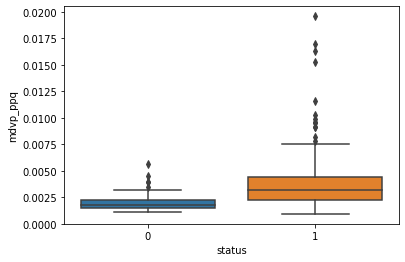

In [ ]:
sns.boxplot(x=pdData['status'],y=pdData[feature]) 

**From above, it is observed that for 'mdvp_ppq' attribute patients with Parkinson's disease have more outliers than Healthy patients.**

#### H. 'jitter_ddp' attribute : (Jitter:DDP - One of the measure of variation in fundamental frequency )

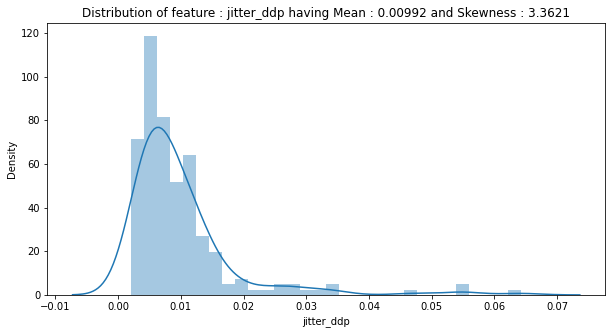

In [ ]:
feature = 'jitter_ddp'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

**From above we can understand the following about jitter_ddp (Jitter:DDP) attribute of the dataset:**
* Mean value of the attribute is 0.0099 with skewness of 3.3621, which shows that the datapoints of the attribute is highly right / positive skewed.
* Maximum datapoints are ranging from 0.002 to 0.012.

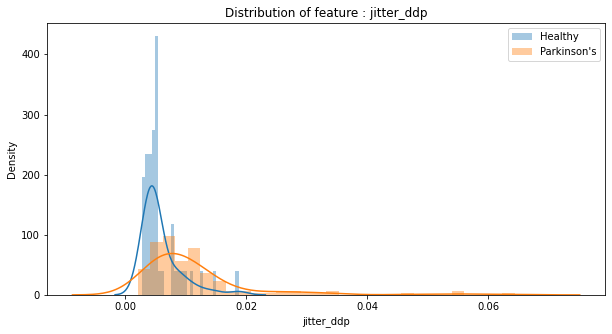

In [ ]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

**From the above we can observe that, patients with jitter_ddp (Jitter:DDP) values greater than 0.008 are more likly to have Parkinson's disease.**
* Lets bucket jitter_ddp (Jitter:DDP) and check w.r.t the different status i.e Healthy or Parkinson's:

status              0           1
jitter_ddp                       
0.00-0.02   26.519337   73.480663
0.02-0.04    0.000000  100.000000
0.04-0.06    0.000000  100.000000
0.06-0.08    0.000000  100.000000


Text(0.5, 1.0, 'PD status with different jitter_ddp group')

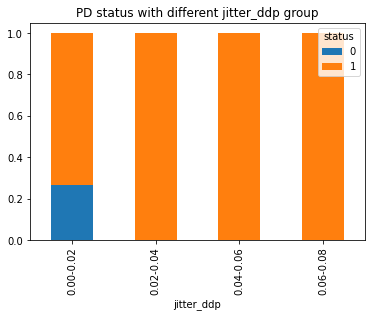

In [ ]:
bins = [0.00,0.02,0.04,0.06,0.80]                                         # defining jitter_ddp bins,
# defining labels of jitter_ddp groups as per bins defined as above
jitter_ddp_group = ['0.00-0.02', '0.02-0.04', '0.04-0.06', '0.06-0.08']
pdData_jitter_ddp_bin = pd.cut(pdData[feature],bins,labels=jitter_ddp_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to jitter_ddp_group_col variable
jitter_ddp_group_col = pd.crosstab(pdData_jitter_ddp_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(jitter_ddp_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
jitter_ddp_group_col.div(jitter_ddp_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different jitter_ddp group")                     # setting title of the figure

- We can find out the following from the above crosstab:
    * **All the patients under jitter_ddp (Jitter:DDP) groups ranging more than 0.02 have Parkinson's disease.**
    * **jitter_ddp (Jitter:DDP) group between 0.00-0.02 having Parkinson's patient with percentage of 73.480 .**
<br><br>
- Let's check outliers for the attribute :

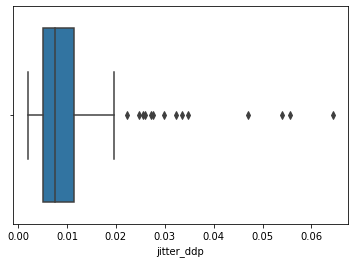

In [ ]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

**In the 'jitter_ddp' attribute some outliers are present, let's check for the same :**

In [ ]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature jitter_ddp : Mean = 0.00992, Median = 0.00749 and Inter-Quartile-Range (IQR) = 0.00652

*****************************************************************************************************************************
There are 14 outliers (7.179 % of the data points) in jitter_ddp feature and the values are [0.02228, 0.02478, 0.03476, 0.06433, 0.02716, 0.05563, 0.02589, 0.02546, 0.02987, 0.02756, 0.03225, 0.05401, 0.04705, 0.03351]
*****************************************************************************************************************************


* Now will check if any outliers present for different target attributes i.e 'status'

<Axes: xlabel='status', ylabel='jitter_ddp'>

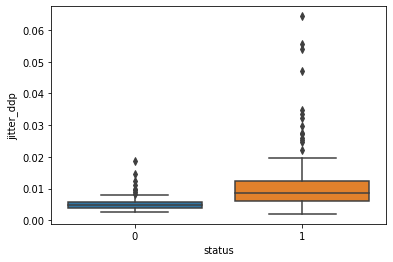

In [ ]:
sns.boxplot(x=pdData['status'],y=pdData[feature]) 

**From above, it is observed that for 'jitter_ddp' attribute patients with Parkinson's disease have more outliers than Healthy patients.**

#### I. 'mdvp_shimmer' attribute : (MDVP:Shimmer - One of the measure of variation in amplitude )

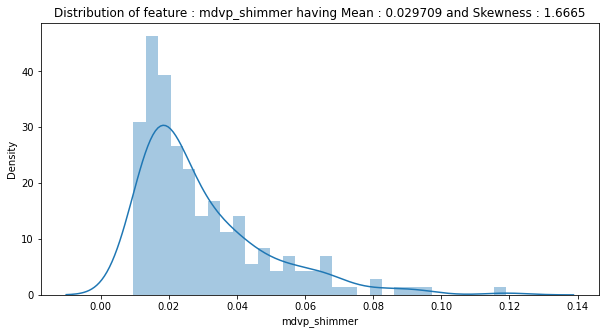

In [ ]:
feature = 'mdvp_shimmer'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

**From above we can understand the following about mdvp_shimmer (MDVP:Shimmer) attribute of the dataset:**
* Mean value of the attribute is 0.0297 with skewness of 1.6665, which shows that the datapoints of the attribute is highly right / positive skewed.
* Maximum datapoints are ranging from 0.009 to 0.02.

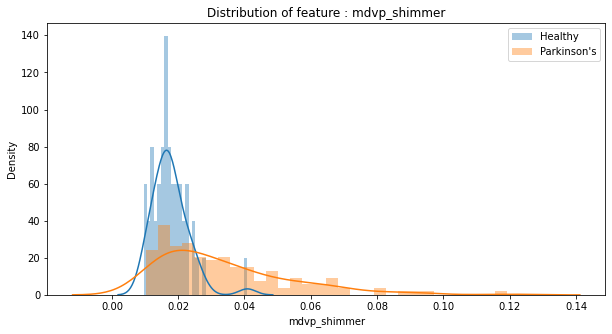

In [ ]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

**From the above we can observe that, patients with mdvp_shimmer (MDVP:Shimmer) values greater than 0.025 are more likly to have Parkinson's disease.**
* Lets bucket mdvp_shimmer (MDVP:Shimmer) and check w.r.t the different status i.e Healthy or Parkinson's:

status                0           1
mdvp_shimmer                       
0.00-0.02     44.871795   55.128205
0.02-0.04     16.438356   83.561644
0.04-0.06      3.703704   96.296296
0.06-0.08      0.000000  100.000000
0.08-0.10      0.000000  100.000000
0.10-0.12      0.000000  100.000000


Text(0.5, 1.0, 'PD status with different mdvp_shimmer group')

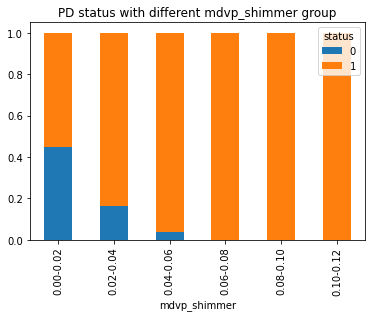

In [ ]:
bins = [0.00,0.02,0.04,0.06,0.08,0.10,0.12]                                         # defining mdvp_shimmer bins,
# defining labels of mdvp_shimmer groups as per bins defined as above
mdvp_shimmer_group = ['0.00-0.02', '0.02-0.04', '0.04-0.06', '0.06-0.08', '0.08-0.10', '0.10-0.12']
pdData_mdvp_shimmer_bin = pd.cut(pdData[feature],bins,labels=mdvp_shimmer_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to mdvp_shimmer_group_col variable
mdvp_shimmer_group_col = pd.crosstab(pdData_mdvp_shimmer_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(mdvp_shimmer_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
mdvp_shimmer_group_col.div(mdvp_shimmer_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different mdvp_shimmer group")                     # setting title of the figure

- We can find out the following from the above crosstab:
    * **All the patients under mdvp_shimmer (MDVP:Shimmer) groups ranging more than 0.06 have Parkinson's disease.**
    * **mdvp_shimmer (MDVP:Shimmer) group between 0.04-0.06 having Parkinson's patient with percentage of 96.296 followed by mdvp_shimmer (MDVP:Shimmer) group between 0.02-0.04 having Parkinson's patient with percentage of 83.562.**
    * **mdvp_shimmer (MDVP:Shimmer) group between 0.00-0.02 having Parkinson's patient with percentage of 55.128 .**
<br><br>
- Let's check outliers for the attribute :

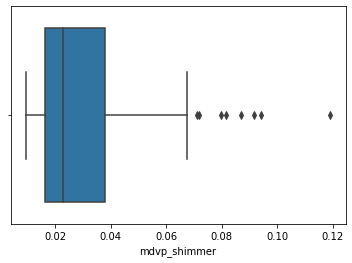

In [ ]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

**In the 'mdvp_shimmer' attribute some outliers are present, let's check for the same :**

In [ ]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature mdvp_shimmer : Mean = 0.029709, Median = 0.02297 and Inter-Quartile-Range (IQR) = 0.02138

*****************************************************************************************************************************
There are 8 outliers (4.103 % of the data points) in mdvp_shimmer feature and the values are [0.07959, 0.09178, 0.09419, 0.08143, 0.07118, 0.0717, 0.11908, 0.08684]
*****************************************************************************************************************************


* Now will check if any outliers present for different target attributes i.e 'status'

<Axes: xlabel='status', ylabel='mdvp_shimmer'>

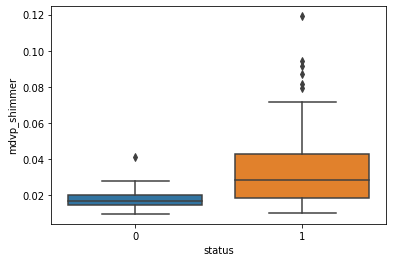

In [ ]:
sns.boxplot(x=pdData['status'],y=pdData[feature]) 

**From above, it is observed that for 'mdvp_shimmer' attribute patients with Parkinson's disease have more outliers than Healthy patients.**

#### J. 'mdvp_shimmer_db' attribute : (MDVP:Shimmer(dB) - One of the measure of variation in amplitude )

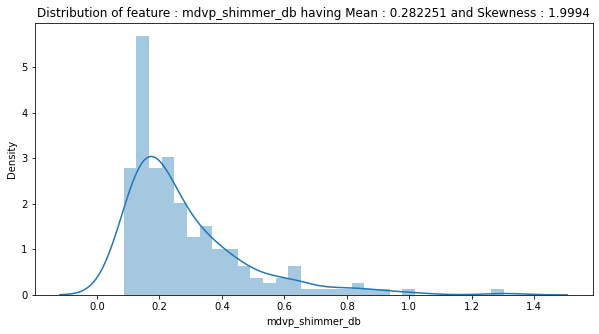

In [ ]:
feature = 'mdvp_shimmer_db'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

**From above we can understand the following about mdvp_shimmer_db (MDVP:Shimmer(dB)) attribute of the dataset:**
* Mean value of the attribute is 0.2823 with skewness of 1.9994, which shows that the datapoints of the attribute is highly right / positive skewed.
* Maximum datapoints are ranging from 0.008 to 0.35 .

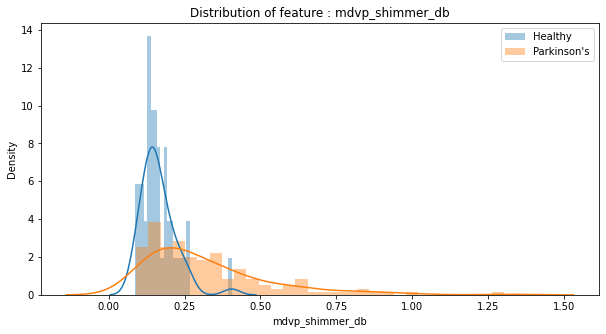

In [ ]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

**From the above we can observe that, patients with mdvp_shimmer_db (MDVP:Shimmer(dB)) values greater than 0.25 are more likly to have Parkinson's disease.**
* Lets bucket mdvp_shimmer_db (MDVP:Shimmer(dB)) and check w.r.t the different status i.e Healthy or Parkinson's:

status                   0           1
mdvp_shimmer_db                       
0.00-0.25        38.596491   61.403509
0.25-0.50         6.779661   93.220339
0.50-0.75         0.000000  100.000000
0.75-1.00         0.000000  100.000000
1.00-1.25         0.000000  100.000000
1.25-1.50         0.000000  100.000000


Text(0.5, 1.0, 'PD status with different mdvp_shimmer_db group')

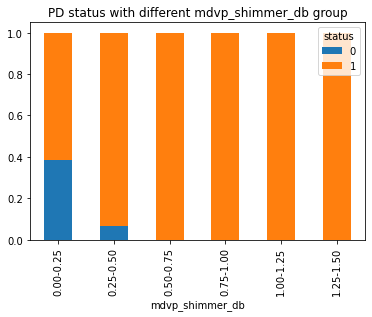

In [ ]:
bins = [0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50]                                         # defining mdvp_shimmer_db bins,
# defining labels of mdvp_shimmer_db groups as per bins defined as above
mdvp_shimmer_db_group = ['0.00-0.25', '0.25-0.50', '0.50-0.75', '0.75-1.00', '1.00-1.25', '1.25-1.50']
pdData_mdvp_shimmer_db_bin = pd.cut(pdData[feature],bins,labels=mdvp_shimmer_db_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to mdvp_shimmer_db_group_col variable
mdvp_shimmer_db_group_col = pd.crosstab(pdData_mdvp_shimmer_db_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(mdvp_shimmer_db_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
mdvp_shimmer_db_group_col.div(mdvp_shimmer_db_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different mdvp_shimmer_db group")                     # setting title of the figure

- We can find out the following from the above crosstab:
    * **All the patients under mdvp_shimmer_db (MDVP:Shimmer(dB)) groups ranging more than 0.50 have Parkinson's disease.**
    * **mdvp_shimmer_db (MDVP:Shimmer(dB)) group between 0.25-0.50 having Parkinson's patient with percentage of 93.220 followed by mdvp_shimmer_db (MDVP:Shimmer(dB)) group between 0.00-0.25 having Parkinson's patient with percentage of 61.404 .**
<br><br>
- Let's check outliers for the attribute :

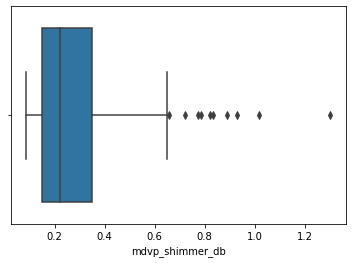

In [ ]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

**In the 'mdvp_shimmer_db' attribute some outliers are present, let's check for the same :**

In [ ]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature mdvp_shimmer_db : Mean = 0.282251, Median = 0.221 and Inter-Quartile-Range (IQR) = 0.2015

*****************************************************************************************************************************
There are 10 outliers (5.128 % of the data points) in mdvp_shimmer_db feature and the values are [0.772, 0.659, 0.891, 0.93, 0.821, 0.722, 0.833, 0.784, 1.302, 1.018]
*****************************************************************************************************************************


* Now will check if any outliers present for different target attributes i.e 'status'

<Axes: xlabel='status', ylabel='mdvp_shimmer_db'>

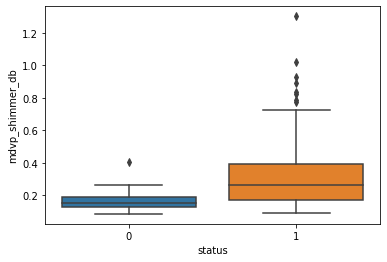

In [ ]:
sns.boxplot(x=pdData['status'],y=pdData[feature]) 

**From above, it is observed that for 'mdvp_shimmer_db' attribute patients with Parkinson's disease have more outliers than Healthy patients.**

#### K. 'shimmer_apq3' attribute : (Shimmer:APQ3) - One of the measure of variation in amplitude )

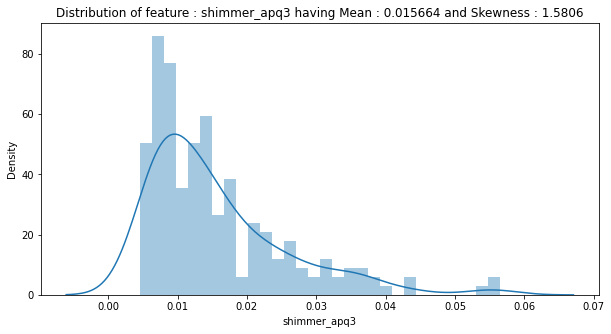

In [ ]:
feature = 'shimmer_apq3'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

**From above we can understand the following about shimmer_apq3 (Shimmer:APQ3) attribute of the dataset:**
* Mean value of the attribute is 0.0157 with skewness of 1.5806, which shows that the datapoints of the attribute is highly right / positive skewed.
* Maximum datapoints are ranging from 0.004 to 0.0175 .

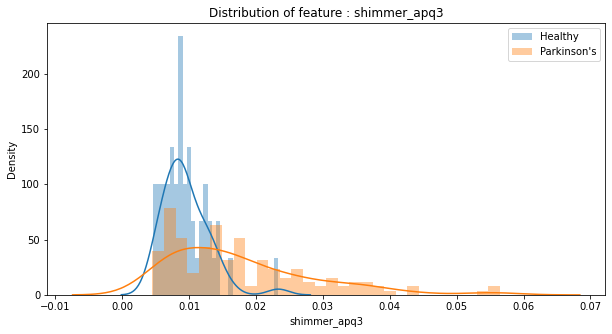

In [ ]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

**From the above we can observe that, patients with shimmer_apq3 (Shimmer:APQ3) values greater than 0.015 are more likly to have Parkinson's disease.**
* Lets bucket shimmer_apq3 (Shimmer:APQ3) and check w.r.t the different status i.e Healthy or Parkinson's:

status                0           1
shimmer_apq3                       
0.00-0.01     41.095890   58.904110
0.01-0.02     23.611111   76.388889
0.02-0.03      3.333333   96.666667
0.03-0.04      0.000000  100.000000
0.04-0.05      0.000000  100.000000
0.05-0.06      0.000000  100.000000


Text(0.5, 1.0, 'PD status with different shimmer_apq3 group')

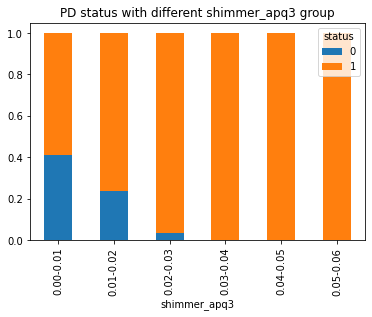

In [ ]:
bins = [0.00, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06]                                         # defining shimmer_apq3 bins,
# defining labels of shimmer_apq3 groups as per bins defined as above
shimmer_apq3_group = ['0.00-0.01', '0.01-0.02', '0.02-0.03', '0.03-0.04', '0.04-0.05', '0.05-0.06']
pdData_shimmer_apq3_bin = pd.cut(pdData[feature],bins,labels=shimmer_apq3_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to shimmer_apq3_group_col variable
shimmer_apq3_group_col = pd.crosstab(pdData_shimmer_apq3_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(shimmer_apq3_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
shimmer_apq3_group_col.div(shimmer_apq3_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different shimmer_apq3 group")                     # setting title of the figure

- We can find out the following from the above crosstab:
    * **All the patients under shimmer_apq3 (Shimmer:APQ3) groups ranging more than 0.03 have Parkinson's disease.**
    * **shimmer_apq3 (Shimmer:APQ3) group between 0.02-0.03 having Parkinson's patient with percentage of 96.667 followed by shimmer_apq3 (Shimmer:APQ3) group between 0.01-0.02 having Parkinson's patient with percentage of 76.389 .**
    * **shimmer_apq3 (Shimmer:APQ3) group between 0.00-0.01 having Parkinson's patient with percentage of 58.904 .**
<br><br>
- Let's check outliers for the attribute :

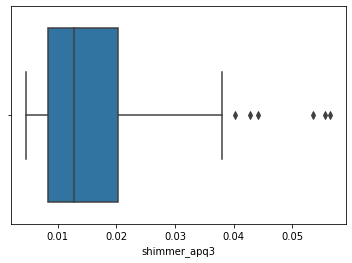

In [ ]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

**In the 'shimmer_apq3' attribute some outliers are present, let's check for the same :**

In [ ]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature shimmer_apq3 : Mean = 0.015664, Median = 0.01279 and Inter-Quartile-Range (IQR) = 0.01202

*****************************************************************************************************************************
There are 6 outliers (3.077 % of the data points) in shimmer_apq3 feature and the values are [0.04421, 0.05358, 0.05551, 0.04016, 0.05647, 0.04284]
*****************************************************************************************************************************


* Now will check if any outliers present for different target attributes i.e 'status'

<Axes: xlabel='status', ylabel='shimmer_apq3'>

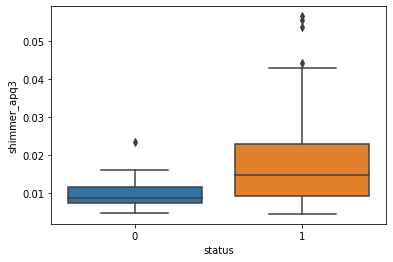

In [ ]:
sns.boxplot(x=pdData['status'],y=pdData[feature]) 

**From above, it is observed that for 'shimmer_apq3' attribute patients with Parkinson's disease have more outliers than Healthy patients.**

#### L. 'shimmer_apq5' attribute : (Shimmer:APQ5) - One of the measure of variation in amplitude )

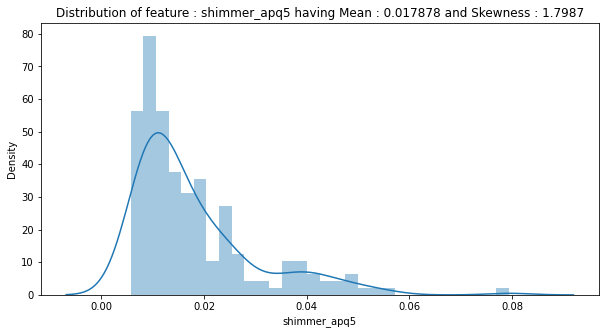

In [ ]:
feature = 'shimmer_apq5'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

**From above we can understand the following about shimmer_apq5 (Shimmer:APQ5) attribute of the dataset:**
* Mean value of the attribute is 0.0179 with skewness of 1.7987, which shows that the datapoints of the attribute is highly right / positive skewed.
* Maximum datapoints are ranging from 0.004 to 0.02 .

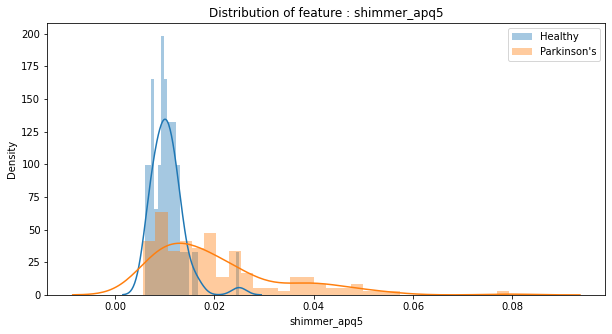

In [ ]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

**From the above we can observe that, patients with shimmer_apq5 (Shimmer:APQ5) values greater than 0.015 are more likly to have Parkinson's disease.**
* Lets bucket shimmer_apq5 (Shimmer:APQ5) and check w.r.t the different status i.e Healthy or Parkinson's:

status                0           1
shimmer_apq5                       
0.00-0.01     41.818182   58.181818
0.01-0.02     27.906977   72.093023
0.02-0.03      3.846154   96.153846
0.03-0.04      0.000000  100.000000
0.04-0.05      0.000000  100.000000
0.05-0.06      0.000000  100.000000
0.06-0.08      0.000000  100.000000


Text(0.5, 1.0, 'PD status with different shimmer_apq5 group')

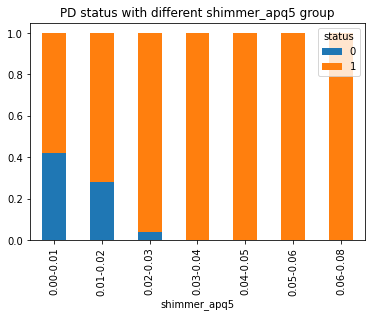

In [ ]:
bins = [0.00, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08]                                         # defining shimmer_apq5 bins,
# defining labels of shimmer_apq5 groups as per bins defined as above
shimmer_apq5_group = ['0.00-0.01', '0.01-0.02', '0.02-0.03', '0.03-0.04', '0.04-0.05', '0.05-0.06', '0.06-0.08']
pdData_shimmer_apq5_bin = pd.cut(pdData[feature],bins,labels=shimmer_apq5_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to shimmer_apq5_group_col variable
shimmer_apq5_group_col = pd.crosstab(pdData_shimmer_apq5_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(shimmer_apq5_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
shimmer_apq5_group_col.div(shimmer_apq5_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different shimmer_apq5 group")                     # setting title of the figure

- We can find out the following from the above crosstab:
    * **All the patients under shimmer_apq5 (Shimmer:APQ5) groups ranging more than 0.03 have Parkinson's disease.**
    * **shimmer_apq5 (Shimmer:APQ5) group between 0.02-0.03 having Parkinson's patient with percentage of 96.154 followed by shimmer_apq3 (Shimmer:APQ3) group between 0.01-0.02 having Parkinson's patient with percentage of 72.093 .**
    * **shimmer_apq5 (Shimmer:APQ5) group between 0.00-0.01 having Parkinson's patient with percentage of 58.182 .**
<br><br>
- Let's check outliers for the attribute :

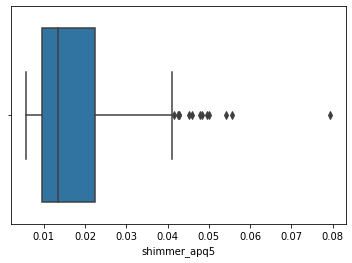

In [ ]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

**In the 'shimmer_apq5' attribute some outliers are present, let's check for the same :**

In [ ]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature shimmer_apq5 : Mean = 0.017878, Median = 0.01347 and Inter-Quartile-Range (IQR) = 0.0128

*****************************************************************************************************************************
There are 13 outliers (6.667 % of the data points) in shimmer_apq5 feature and the values are [0.04518, 0.04825, 0.04159, 0.04254, 0.04282, 0.04962, 0.04791, 0.05005, 0.05426, 0.0458, 0.04265, 0.0794, 0.05556]
*****************************************************************************************************************************


* Now will check if any outliers present for different target attributes i.e 'status'

<Axes: xlabel='status', ylabel='shimmer_apq5'>

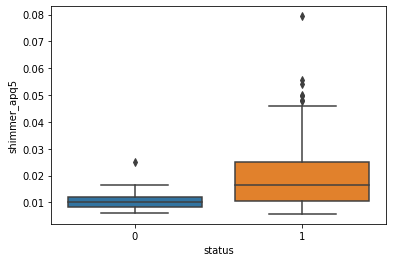

In [ ]:
sns.boxplot(x=pdData['status'],y=pdData[feature]) 

**From above, it is observed that for 'shimmer_apq5' attribute patients with Parkinson's disease have more outliers than Healthy patients.**

#### M. 'mdvp_apq' attribute : (MDVP:APQ) - One of the measure of variation in amplitude )

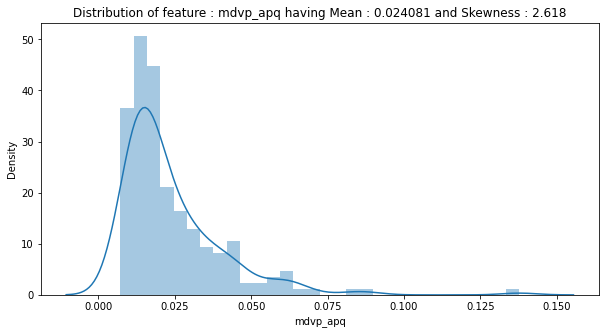

In [ ]:
feature = 'mdvp_apq'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

**From above we can understand the following about mdvp_apq (MDVP:APQ) attribute of the dataset:**
* Mean value of the attribute is 0.0241 with skewness of 2.618, which shows that the datapoints of the attribute is highly right / positive skewed.
* Maximum datapoints are ranging from 0.007 to 0.03 .

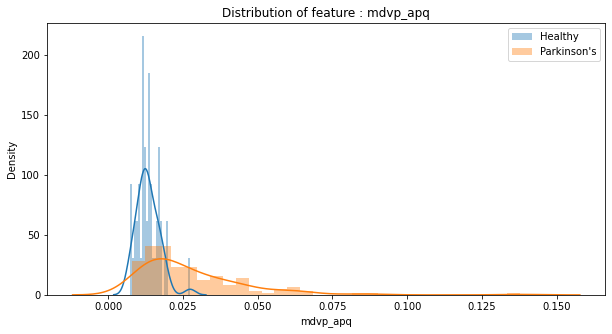

In [ ]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

**From the above we can observe that, patients with mdvp_apq (MDVP:APQ) values greater than 0.02 are more likly to have Parkinson's disease.**
* Lets bucket mdvp_apq (MDVP:APQ) and check w.r.t the different status i.e Healthy or Parkinson's:

status             0           1
mdvp_apq                        
0.00-0.02  42.727273   57.272727
0.02-0.04   1.754386   98.245614
0.04-0.06   0.000000  100.000000
0.06-0.08   0.000000  100.000000
0.08-0.10   0.000000  100.000000
0.10-0.14   0.000000  100.000000


Text(0.5, 1.0, 'PD status with different mdvp_apq group')

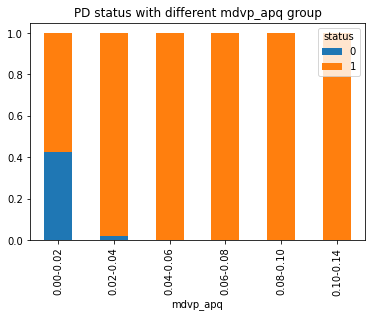

In [ ]:
bins = [0.00, 0.02, 0.04, 0.06, 0.08, 0.10, 0.14]                                         # defining mdvp_apq bins,
# defining labels of mdvp_apq groups as per bins defined as above
mdvp_apq_group = ['0.00-0.02', '0.02-0.04', '0.04-0.06', '0.06-0.08', '0.08-0.10', '0.10-0.14']
pdData_mdvp_apq_bin = pd.cut(pdData[feature],bins,labels=mdvp_apq_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to mdvp_apq_group_col variable
mdvp_apq_group_col = pd.crosstab(pdData_mdvp_apq_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(mdvp_apq_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
mdvp_apq_group_col.div(mdvp_apq_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different mdvp_apq group")                     # setting title of the figure

- We can find out the following from the above crosstab:
    * **All the patients under mdvp_apq (MDVP:APQ) groups ranging more than 0.04 have Parkinson's disease.**
    * **mdvp_apq (MDVP:APQ) group between 0.02-0.04 having Parkinson's patient with percentage of 98.246 followed by mdvp_apq (MDVP:APQ) group between 0.00-0.02 having Parkinson's patient with percentage of 57.273 .**
<br><br>
- Let's check outliers for the attribute :

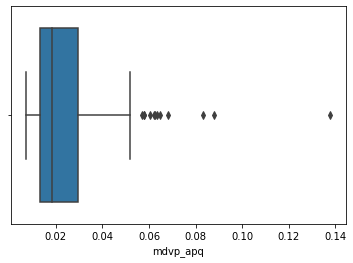

In [ ]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

**In the 'mdvp_apq' attribute some outliers are present, let's check for the same :**

In [ ]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature mdvp_apq : Mean = 0.024081, Median = 0.01826 and Inter-Quartile-Range (IQR) = 0.01632

*****************************************************************************************************************************
There are 12 outliers (6.154 % of the data points) in mdvp_apq feature and the values are [0.05767, 0.0569, 0.05783, 0.06196, 0.06023, 0.08808, 0.06359, 0.06824, 0.0646, 0.06259, 0.13778, 0.08318]
*****************************************************************************************************************************


* Now will check if any outliers present for different target attributes i.e 'status'

<Axes: xlabel='status', ylabel='mdvp_apq'>

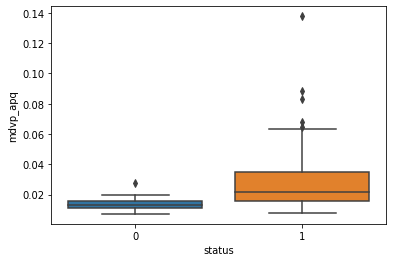

In [ ]:
sns.boxplot(x=pdData['status'],y=pdData[feature]) 

**From above, it is observed that for 'mdvp_apq' attribute patients with Parkinson's disease have more outliers than Healthy patients.**

#### N. 'shimmer_dda' attribute : (Shimmer:DDA) - One of the measure of variation in amplitude )

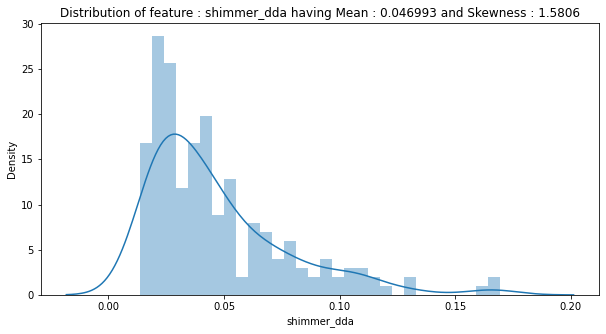

In [ ]:
feature = 'shimmer_dda'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

**From above we can understand the following about shimmer_dda (Shimmer:DDA) attribute of the dataset:**
* Mean value of the attribute is 0.0470 with skewness of 1.5806, which shows that the datapoints of the attribute is highly right / positive skewed.
* Maximum datapoints are ranging from 0.013 to 0.06 .

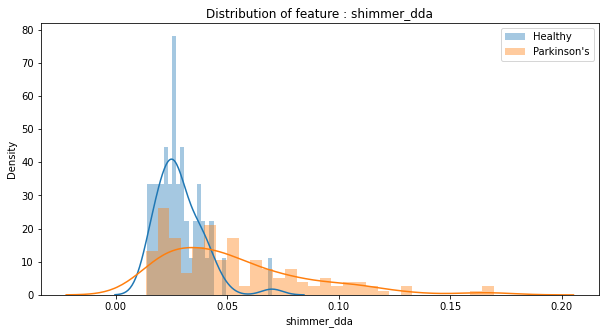

In [ ]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

**From the above we can observe that, patients with shimmer_dda (Shimmer:DDA) values greater than 0.04 are more likly to have Parkinson's disease.**
* Lets bucket shimmer_dda (Shimmer:DDA) and check w.r.t the different status i.e Healthy or Parkinson's:

status               0           1
shimmer_dda                       
0.010-0.025  37.254902   62.745098
0.025-0.050  35.000000   65.000000
0.050-0.075   3.030303   96.969697
0.075-0.100   0.000000  100.000000
0.100-0.125   0.000000  100.000000
0.125-0.150   0.000000  100.000000


Text(0.5, 1.0, 'PD status with different shimmer_dda group')

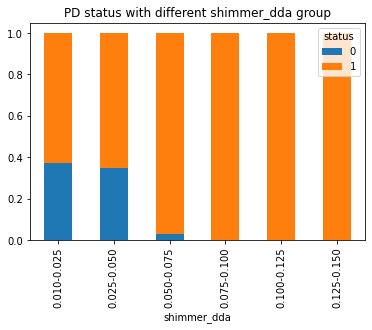

In [ ]:
bins = [0.010, 0.025, 0.050, 0.075, 0.100, 0.125, 0.150]                                         # defining shimmer_dda bins,
# defining labels of shimmer_dda groups as per bins defined as above
shimmer_dda_group = ['0.010-0.025', '0.025-0.050', '0.050-0.075', '0.075-0.100', '0.100-0.125', '0.125-0.150']
pdData_shimmer_dda_bin = pd.cut(pdData[feature],bins,labels=shimmer_dda_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to shimmer_dda_group_col variable
shimmer_dda_group_col = pd.crosstab(pdData_shimmer_dda_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(shimmer_dda_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
shimmer_dda_group_col.div(shimmer_dda_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different shimmer_dda group")                     # setting title of the figure

- We can find out the following from the above crosstab:
    * **All the patients under shimmer_dda (Shimmer:DDA) groups ranging more than 0.075 have Parkinson's disease.**
    * **shimmer_dda (Shimmer:DDA) group between 0.050-0.075 having Parkinson's patient with percentage of 96.970 followed by shimmer_dda (Shimmer:DDA) group between 0.025-0.050 having Parkinson's patient with percentage of 65.000 .**
    * **shimmer_dda (Shimmer:DDA) group between 0.010-0.025 having Parkinson's patient with percentage of 62.745 **
<br><br>
- Let's check outliers for the attribute :

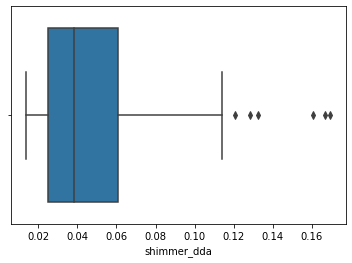

In [ ]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

**In the 'shimmer_dda' attribute some outliers are present, let's check for the same :**

In [ ]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature shimmer_dda : Mean = 0.046993, Median = 0.03836 and Inter-Quartile-Range (IQR) = 0.03606

*****************************************************************************************************************************
There are 6 outliers (3.077 % of the data points) in shimmer_dda feature and the values are [0.13262, 0.16074, 0.16654, 0.12047, 0.16942, 0.12851]
*****************************************************************************************************************************


* Now will check if any outliers present for different target attributes i.e 'status'

<Axes: xlabel='status', ylabel='shimmer_dda'>

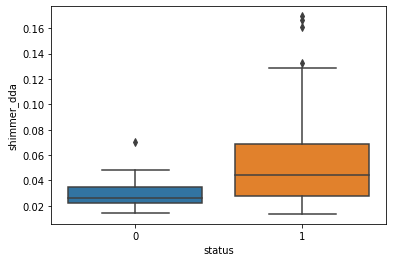

In [ ]:
sns.boxplot(x=pdData['status'],y=pdData[feature]) 

**From above, it is observed that for 'shimmer_dda' attribute patients with Parkinson's disease have more outliers than Healthy patients.**

#### O. 'nhr' attribute : (NHR) - Measures of ratio of noise to tonal components in the voice )

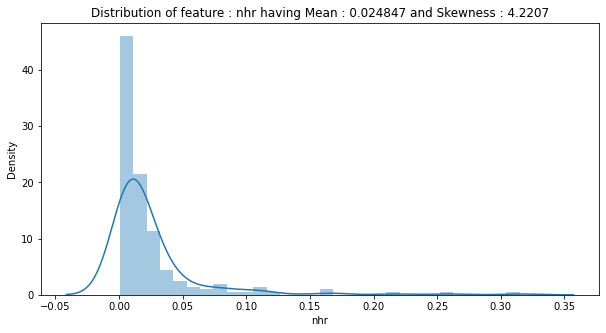

In [ ]:
feature = 'nhr'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

**From above we can understand the following about nhr (NHR) attribute of the dataset:**
* Mean value of the attribute is 0.0248 with skewness of 4.2207, which shows that the datapoints of the attribute is highly right / positive skewed.
* Maximum datapoints are ranging from 0.00 to 0.030 .

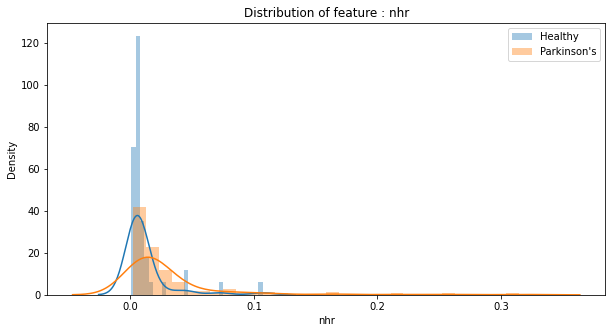

In [ ]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

**From the above we can observe that, patients with nhr (NHR) values greater than 0.02 are more likly to have Parkinson's disease.**
* Lets bucket nhr (NHR) and check w.r.t the different status i.e Healthy or Parkinson's:

status             0           1
nhr                             
0.00-0.05  26.285714   73.714286
0.05-0.10  10.000000   90.000000
0.10-0.15  20.000000   80.000000
0.15-0.20   0.000000  100.000000
0.20-0.25   0.000000  100.000000
0.25-0.32   0.000000  100.000000


Text(0.5, 1.0, 'PD status with different nhr group')

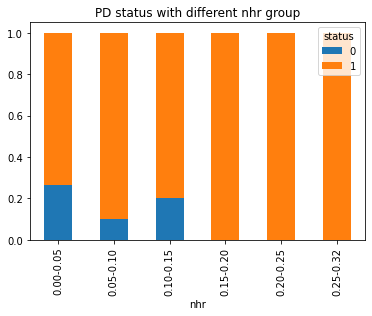

In [ ]:
bins = [0.00, 0.05, 0.10, 0.15, 0.20, 0.25, 0.32]                                         # defining nhr bins,
# defining labels of nhr groups as per bins defined as above
nhr_group = ['0.00-0.05', '0.05-0.10', '0.10-0.15', '0.15-0.20', '0.20-0.25', '0.25-0.32']
pdData_nhr_bin = pd.cut(pdData[feature],bins,labels=nhr_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to nhr_group_col variable
nhr_group_col = pd.crosstab(pdData_nhr_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(nhr_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
nhr_group_col.div(nhr_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different nhr group")                     # setting title of the figure

- We can find out the following from the above crosstab:
    * **All the patients under nhr (NHR) groups ranging more than 0.15 have Parkinson's disease.**
    * **nhr (NHR) group between 0.05-0.10 having Parkinson's patient with percentage of 90.000 followed by nhr (NHR) group between 0.010-0.15 having Parkinson's patient with percentage of 80.000 .**
    * **nhr (NHR) group between 0.00-0.05 having Parkinson's patient with percentage of 73.714 **
<br><br>
- Let's check outliers for the attribute :

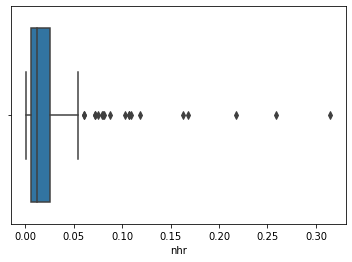

In [ ]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

**In the 'nhr' attribute some outliers are present, let's check for the same :**

In [ ]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature nhr : Mean = 0.024847, Median = 0.01166 and Inter-Quartile-Range (IQR) = 0.019715

*****************************************************************************************************************************
There are 19 outliers (9.744 % of the data points) in nhr feature and the values are [0.07223, 0.08725, 0.08151, 0.10323, 0.16744, 0.31482, 0.11843, 0.2593, 0.06051, 0.0753, 0.06057, 0.08069, 0.07889, 0.10952, 0.21713, 0.16265, 0.10748, 0.10715, 0.07223]
*****************************************************************************************************************************


* Now will check if any outliers present for different target attributes i.e 'status'

<Axes: xlabel='status', ylabel='nhr'>

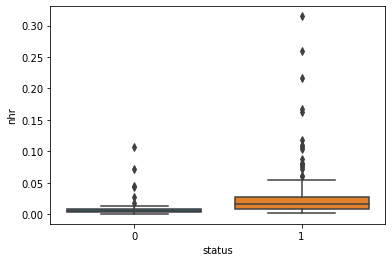

In [ ]:
sns.boxplot(x=pdData['status'],y=pdData[feature]) 

**From above, it is observed that for 'nhr' attribute patients with Parkinson's disease have more outliers than Healthy patients.**

#### P. 'hnr' attribute : (HNR) - Measures of ratio of noise to tonal components in the voice )

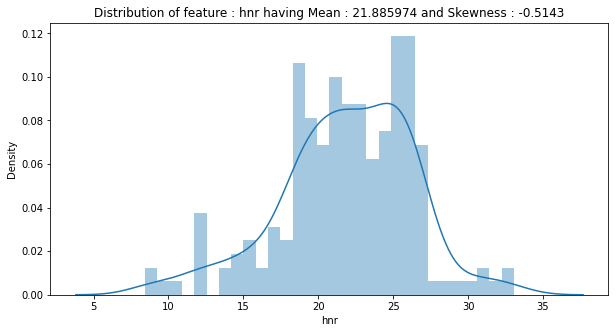

In [ ]:
feature = 'hnr'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

**From above we can understand the following about hnr (HNR) attribute of the dataset:**
* Mean value of the attribute is 21.8860 with skewness of -0.5143, which shows that the datapoints of the attribute is slightly left / negative skewed.
* Maximum datapoints are ranging from 18 to 27 .

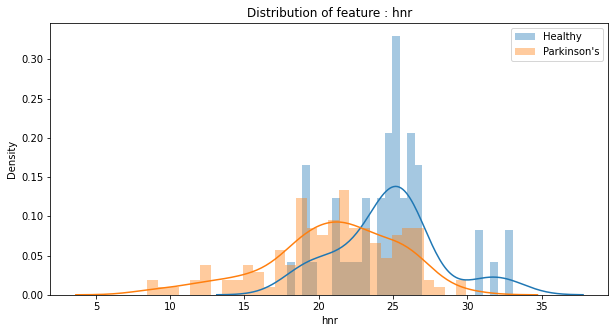

In [ ]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

**From the above we can observe that, patients with hnr (HNR) values less than 22.5 are more likly to have Parkinson's disease.**
* Lets bucket hnr (HNR) and check w.r.t the different status i.e Healthy or Parkinson's:

status           0           1
hnr                           
8-10      0.000000  100.000000
10-15     0.000000  100.000000
15-20    13.043478   86.956522
20-25    22.222222   77.777778
25-30    39.583333   60.416667
30-34   100.000000    0.000000


Text(0.5, 1.0, 'PD status with different hnr group')

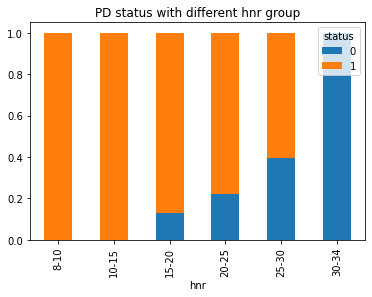

In [ ]:
bins = [8, 10, 15, 20, 25 , 30, 34]                                         # defining hnr bins,
# defining labels of hnr groups as per bins defined as above
hnr_group = ['8-10', '10-15', '15-20', '20-25', '25-30', '30-34']
pdData_hnr_bin = pd.cut(pdData[feature],bins,labels=hnr_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to hnr_group_col variable
hnr_group_col = pd.crosstab(pdData_hnr_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(hnr_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
hnr_group_col.div(hnr_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different hnr group")                     # setting title of the figure

- We can find out the following from the above crosstab:
    * **All the patients under hnr (HNR) groups ranging less than 15 have Parkinson's disease.**
    * **hnr (HNR) group between 15-20 having Parkinson's patient with percentage of 86.957 followed by hnr (HNR) group between 20-25 having Parkinson's patient with percentage of 77.778 .**
    * **hnr (HNR) group between 25-30 having Parkinson's patient with percentage of 60.417 .**
    * **All patient having hnr (HNR) more than 30 are healthy.**
<br><br>
- Let's check outliers for the attribute :

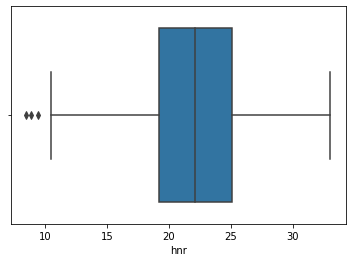

In [ ]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

**In the 'hnr' attribute some outliers are present, let's check for the same :**

In [ ]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature hnr : Mean = 21.885974, Median = 22.085 and Inter-Quartile-Range (IQR) = 5.8775

*****************************************************************************************************************************
There are 3 outliers (1.538 % of the data points) in hnr feature and the values are [8.867, 8.441, 9.449]
*****************************************************************************************************************************


* Now will check if any outliers present for different target attributes i.e 'status'

<Axes: xlabel='status', ylabel='hnr'>

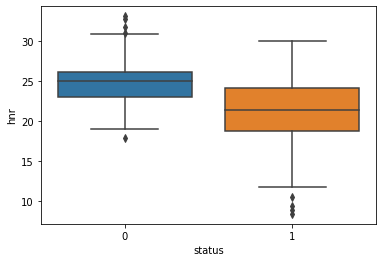

In [ ]:
sns.boxplot(x=pdData['status'],y=pdData[feature]) 

**From above, it is observed that for 'hnr' attribute with Parkinson's disease have outliers present below lower quartile range whereas for healthy patients outliers present both lower and upper quartile range..**

#### Q. 'rpde' attribute : (RPDE - Nonlinear dynamical complexity measure) 

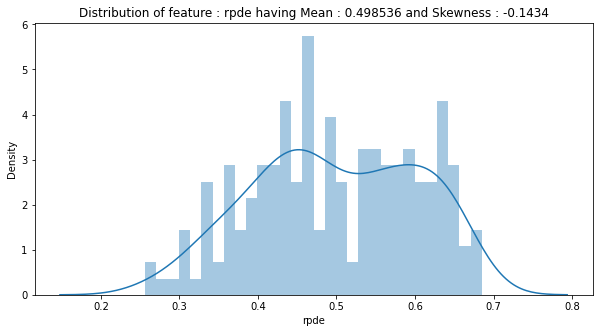

In [ ]:
feature = 'rpde'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

**From above we can understand the following about rpde (RPDE) attribute of the dataset:**
* Mean value of the attribute is 0.4985 with skewness of -0.1434, which shows that the skewness of the attribute is negligible.
* Maximum datapoints are ranging from 0.4 to 0.68 .

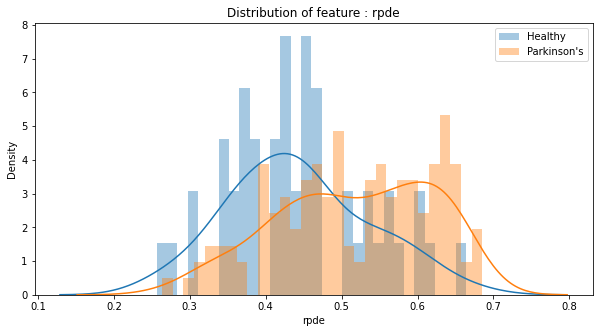

In [ ]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

**From the above we can observe that, patients with rpde (RPDE) values less than 0.49 are more likly to have Parkinson's disease.**
* Lets bucket rpde (RPDE) and check w.r.t the different status i.e Healthy or Parkinson's:

status             0          1
rpde                           
0.25-0.35  41.176471  58.823529
0.35-0.45  41.176471  58.823529
0.45-0.55  21.428571  78.571429
0.55-0.65  11.864407  88.135593
0.65-0.75   8.333333  91.666667


Text(0.5, 1.0, 'PD status with different rpde group')

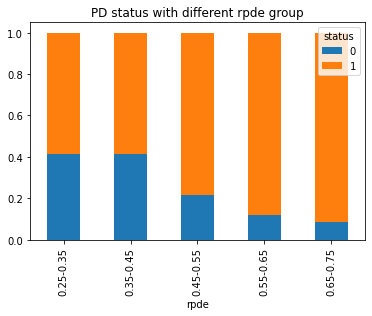

In [ ]:
bins = [0.25, 0.35, 0.45, 0.55, 0.65, 0.75]                                         # defining rpde bins,
# defining labels of rpde groups as per bins defined as above
rpde_group = ['0.25-0.35', '0.35-0.45', '0.45-0.55', '0.55-0.65', '0.65-0.75']
pdData_rpde_bin = pd.cut(pdData[feature],bins,labels=rpde_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to rpde_group_col variable
rpde_group_col = pd.crosstab(pdData_rpde_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(rpde_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
rpde_group_col.div(rpde_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different rpde group")                     # setting title of the figure

- We can find out the following from the above crosstab:
    * **rpde (RPDE) group between 0.65-0.75 having Parkinson's patient with highest percentage of 91.667 .**
    * **rpde (RPDE) group between 0.55-0.65 having Parkinson's patient with percentage of 88.135 followed by rpde (RPDE) group between 0.45-0.55 having Parkinson's patient with percentage of 78.571 .**
    * **Both rpde (RPDE) group between 0.25-0.35 and 0.35-0.45 having Parkinson's patient with percentage of 58.824 .**
    <br><br>
- Let's check outliers for the attribute :

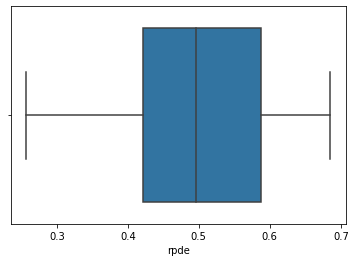

In [ ]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

**there are no outliers presnt in the 'rpde' feature / attribute as we can see from above boxplot.**
* Now will check if any outliers present for different target attributes i.e 'status'

<Axes: xlabel='status', ylabel='rpde'>

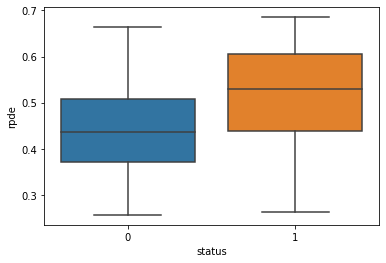

In [ ]:
sns.boxplot(x=pdData['status'],y=pdData[feature]) 

**From above, it is observed there are no outliers present in mdvp_fo_hz attribute for different 'status' attributes.**

#### R. 'd2' attribute : (D2 - Nonlinear dynamical complexity measure) 

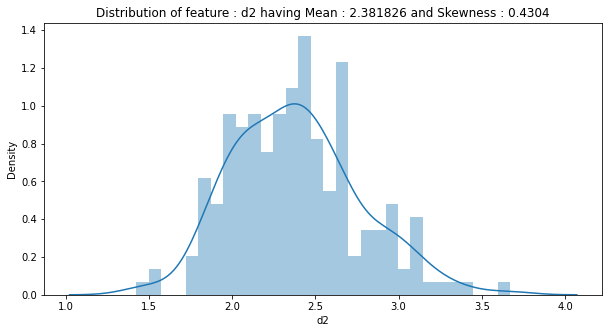

In [ ]:
feature = 'd2'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

**From above we can understand the following about d2 (D2) attribute of the dataset:**
* Mean value of the attribute is 2.382 with skewness of 0.4304, which shows that the skewness of the attribute is negligible.
* Maximum datapoints are ranging from 2.0 to 2.75 .

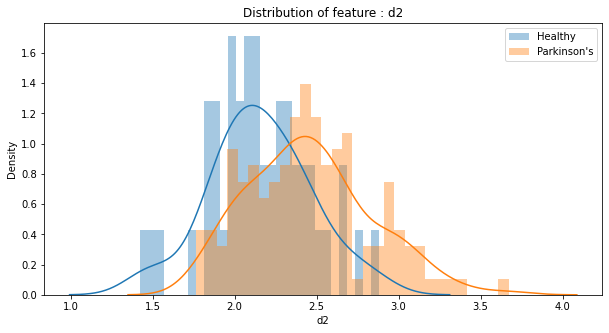

In [ ]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

**From the above we can observe that, patients with d2 (D2) values greater than 2.4 are more likly to have Parkinson's disease.**
* Lets bucket d2 (D2) and check w.r.t the different status i.e Healthy or Parkinson's:

status            0           1
d2                             
1.0-1.5  100.000000    0.000000
1.5-2.0   44.444444   55.555556
2.0-2.5   29.411765   70.588235
2.5-3.0    9.615385   90.384615
3.0-3.7    0.000000  100.000000


Text(0.5, 1.0, 'PD status with different d2 group')

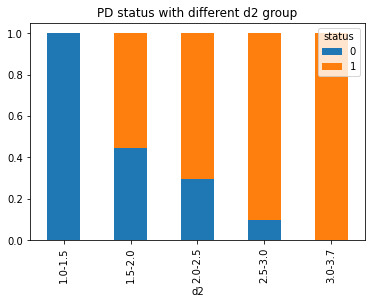

In [ ]:
bins = [1.0, 1.5, 2.0, 2.5, 3.0, 3.7]                                         # defining d2 bins,
# defining labels of d2 groups as per bins defined as above
d2_group = ['1.0-1.5', '1.5-2.0', '2.0-2.5', '2.5-3.0', '3.0-3.7']
pdData_d2_bin = pd.cut(pdData[feature],bins,labels=d2_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to d2_group_col variable
d2_group_col = pd.crosstab(pdData_d2_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(d2_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
d2_group_col.div(d2_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different d2 group")                     # setting title of the figure

- We can find out the following from the above crosstab:
    * **All patient with d2 (D2) group with value more than 3.0 are having Parkinson's disease.**
    * **d2 (D2) group between 2.5-3.0 having Parkinson's patient with percentage of 90.385 followed by d2 (D2) group between 2.0-2.5 having Parkinson's patient with percentage of 70.588 .**
    * **All patient with d2 (D2) group with value less than 1.5 are healthy patients.**
    <br><br>
- Let's check outliers for the attribute :

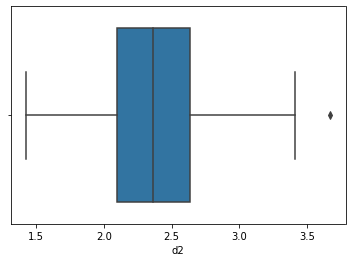

In [ ]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

**In the 'd2' attribute some outliers are present, let's check for the same :**

In [ ]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature d2 : Mean = 2.381826, Median = 2.361532 and Inter-Quartile-Range (IQR) = 0.53733

*****************************************************************************************************************************
There are 1 outliers (0.513 % of the data points) in d2 feature and the values are [3.671155]
*****************************************************************************************************************************


* Now will check if any outliers present for different target attributes i.e 'status'

<Axes: xlabel='status', ylabel='d2'>

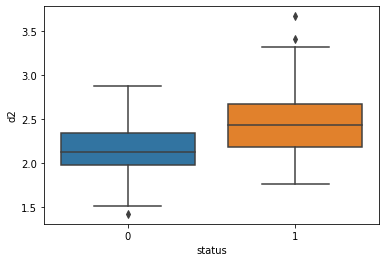

In [ ]:
sns.boxplot(x=pdData['status'],y=pdData[feature]) 

**From above, it is observed that for 'd2' attribute with Parkinson's disease have outliers present above upper quartile range whereas for healthy patients outliers present below lower quartile range.**

#### S. 'dfa' attribute : (DFA - Signal fractal scaling exponent) 

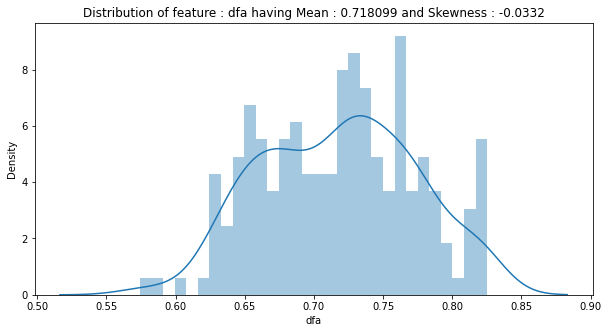

In [ ]:
feature = 'dfa'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

**From above we can understand the following about dfa (DFA) attribute of the dataset:**
* Mean value of the attribute is 0.7180 with skewness of -0.0332, which shows that the skewness of the attribute is negligible.

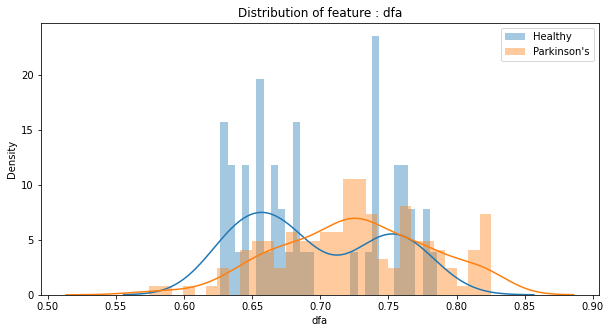

In [ ]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

**From the above we can observe that, patients with dfa (DFA) values greater than 0.68 are more likly to have Parkinson's disease.**
* Lets bucket dfa (DFA) and check w.r.t the different status i.e Healthy or Parkinson's:

status           0           1
dfa                           
0.5-0.6   0.000000  100.000000
0.6-0.7  39.189189   60.810811
0.7-0.8  18.269231   81.730769
0.8-0.9   0.000000  100.000000


Text(0.5, 1.0, 'PD status with different dfa group')

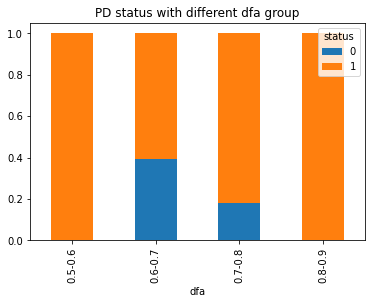

In [ ]:
bins = [0.5, 0.6, 0.7, 0.8, 0.9]                                         # defining dfa bins,
# defining labels of dfa groups as per bins defined as above
dfa_group = ['0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9']
pdData_dfa_bin = pd.cut(pdData[feature],bins,labels=dfa_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to dfa_group_col variable
dfa_group_col = pd.crosstab(pdData_dfa_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(dfa_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
dfa_group_col.div(dfa_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different dfa group")                     # setting title of the figure

- We can find out the following from the above crosstab:
    * **All patient with dfa (DFA) group with value more than 0.8 and value less than 0.6 are having Parkinson's disease.**
    * **dfa (DFA) group between 0.7-0.8 having Parkinson's patient with percentage of 81.731 followed by dfa (DFA) group between 0.6-0.7 having Parkinson's patient with percentage of 60.811 .**
    <br><br>
- Let's check outliers for the attribute :

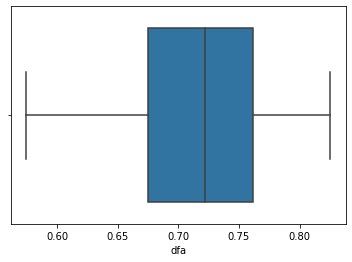

In [ ]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

**there are no outliers presnt in the 'dfa' feature / attribute as we can see from above boxplot.**
* Now will check if any outliers present for different target attributes i.e 'status'

<Axes: xlabel='status', ylabel='dfa'>

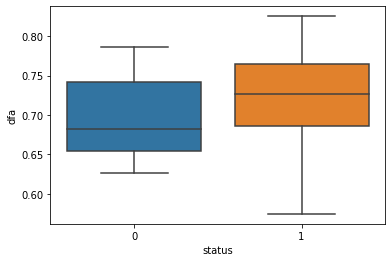

In [ ]:
sns.boxplot(x=pdData['status'],y=pdData[feature]) 

**From above, it is observed there are no outliers present in dfa attribute for different 'status' attributes.**

#### T. 'spread1' attribute : (Nonlinear measures of fundamental frequency variation ) 

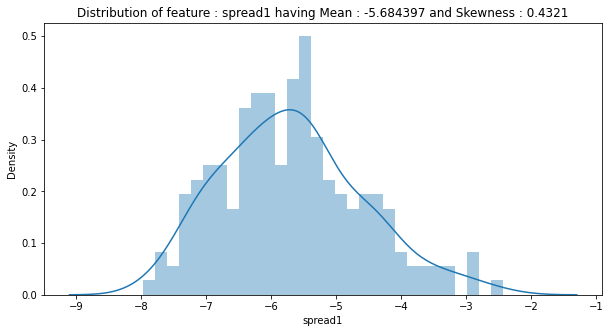

In [ ]:
feature = 'spread1'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

**From above we can understand the following about spread1 attribute of the dataset:**
* Mean value of the attribute is -5.6843 with skewness of 0.4321, which shows that the skewness of the attribute is negligible.

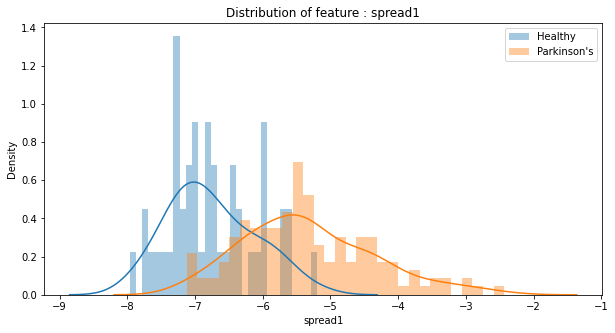

In [ ]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

**From the above we can observe that, patients with spread1 values greater than -6.2 are more likly to have Parkinson's disease.**
* Lets bucket spread1 and check w.r.t the different status i.e Healthy or Parkinson's:

status           0           1
spread1                       
-8 : -6  50.617284   49.382716
-6 : -4   6.930693   93.069307
-4 : -2   0.000000  100.000000


Text(0.5, 1.0, 'PD status with different spread1 group')

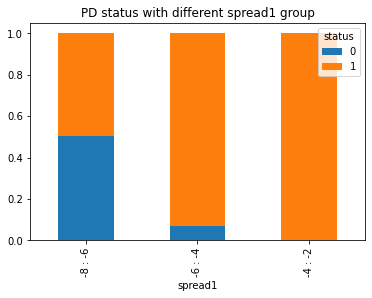

In [ ]:
bins = [-8,-6,-4,-2]                                         # defining spread1 bins,
# defining labels of spread1 groups as per bins defined as above
spread1_group = ['-8 : -6', '-6 : -4', '-4 : -2']
pdData_spread1_bin = pd.cut(pdData[feature],bins,labels=spread1_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to spread1_group_col variable
spread1_group_col = pd.crosstab(pdData_spread1_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(spread1_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
spread1_group_col.div(spread1_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different spread1 group")                     # setting title of the figure

- We can find out the following from the above crosstab:
    * **All patient with spread1 group with value more than -4.0 are having Parkinson's disease.**
    * **spread1 group between -6.0 to -4.0 having Parkinson's patient with percentage of 93.070 followed by spread1 group between -8.0 to -6.0 having Parkinson's patient with percentage of 49.383 .**
    <br><br>
- Let's check outliers for the attribute :

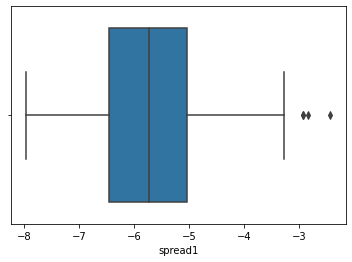

In [ ]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

**In the 'spread1' attribute some outliers are present, let's check for the same :**

In [ ]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature spread1 : Mean = -5.684397, Median = -5.720868 and Inter-Quartile-Range (IQR) = 1.403904

*****************************************************************************************************************************
There are 4 outliers (2.051 % of the data points) in spread1 feature and the values are [-2.93107, -2.434031, -2.839756, -2.929379]
*****************************************************************************************************************************


* Now will check if any outliers present for different target attributes i.e 'status'

<Axes: xlabel='status', ylabel='spread1'>

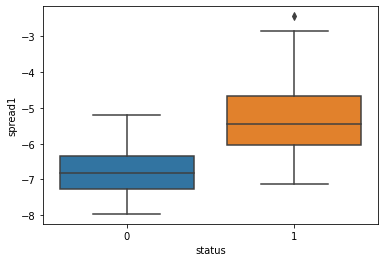

In [ ]:
sns.boxplot(x=pdData['status'],y=pdData[feature]) 

**From above, it is observed that for 'spread1' attribute with Parkinson's disease have outliers present on above upper quartile range whereas for healthy patients have no outliers.**

#### U. 'spread2' attribute : (Nonlinear measures of fundamental frequency variation  

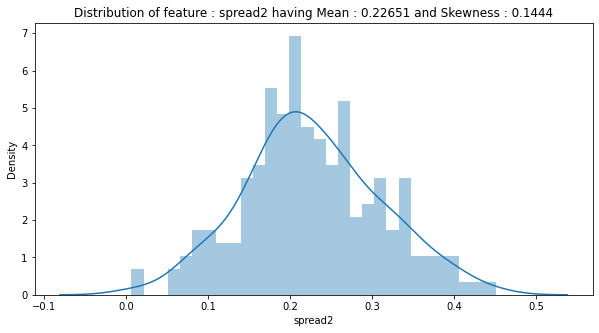

In [ ]:
feature = 'spread2'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

**From above we can understand the following about spread2 attribute of the dataset:**
* Mean value of the attribute is 0.2265 with skewness of 0.1444, which shows that the skewness of the attribute is negligible.

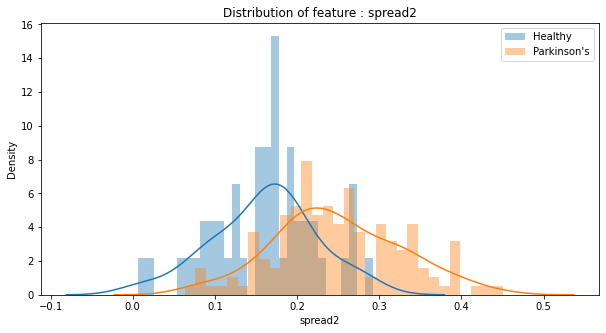

In [ ]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

**From the above we can observe that, patients with spread2 values greater than 0.21 are more likly to have Parkinson's disease.**
* Lets bucket spread2 and check w.r.t the different status i.e Healthy or Parkinson's:

status           0           1
spread2                       
0.0-0.1  64.285714   35.714286
0.1-0.2  46.666667   53.333333
0.2-0.3  13.414634   86.585366
0.3-0.4   0.000000  100.000000
0.4-0.5   0.000000  100.000000


Text(0.5, 1.0, 'PD status with different spread2 group')

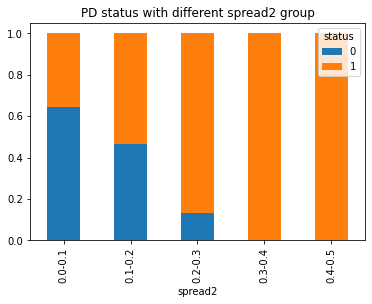

In [ ]:
bins = [0.0, 0.1, 0.2, 0.3, 0.4,0.5]                                         # defining spread2 bins,
# defining labels of spread2 groups as per bins defined as above
spread2_group = ['0.0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5']
pdData_spread2_bin = pd.cut(pdData[feature],bins,labels=spread2_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to spread2_group_col variable
spread2_group_col = pd.crosstab(pdData_spread2_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(spread2_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
spread2_group_col.div(spread2_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different spread2 group")                     # setting title of the figure

- We can find out the following from the above crosstab:
    * **All patient with spread2 group with value more than 0.3 are having Parkinson's disease.**
    * **spread2 group between 0.2-0.3 having Parkinson's patient with percentage of 86.585 followed by spread2 group between 0.1-0.2 having Parkinson's patient with percentage of 53.333 .**
    * **spread2 group between 0.0-0.1 having Parkinson's patient with percentage of 35.714 .**
    <br><br>
- Let's check outliers for the attribute :

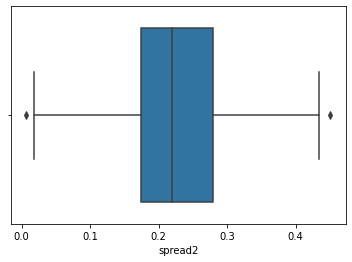

In [ ]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

**In the 'spread2' attribute some outliers are present, let's check for the same :**

In [ ]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature spread2 : Mean = 0.22651, Median = 0.218885 and Inter-Quartile-Range (IQR) = 0.104883

*****************************************************************************************************************************
There are 2 outliers (1.026 % of the data points) in spread2 feature and the values are [0.006274, 0.450493]
*****************************************************************************************************************************


* Now will check if any outliers present for different target attributes i.e 'status'

<Axes: xlabel='status', ylabel='spread2'>

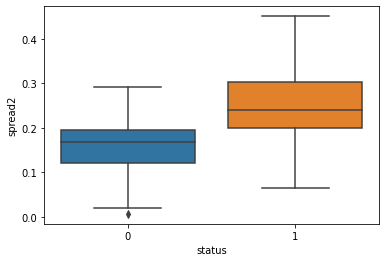

In [ ]:
sns.boxplot(x=pdData['status'],y=pdData[feature]) 

**From above, it is observed that for 'spread2' attribute for healthy patients have outliers.**

#### V. 'ppe' attribute : (PPE - Nonlinear measures of fundamental frequency variation ) 

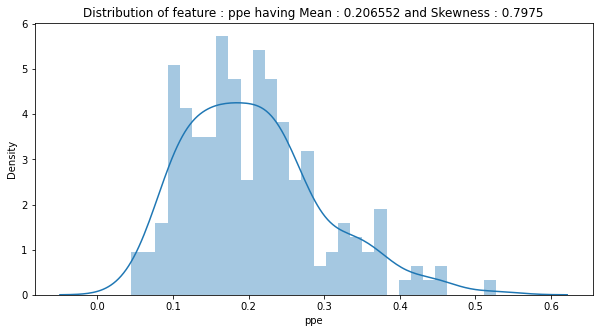

In [ ]:
feature = 'ppe'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

**From above we can understand the following about ppe (PPE) attribute of the dataset:**
* Mean value of the attribute is 0.2066 with skewness of 0.7975, which shows that the datapoints of the attribute is slightly right / positive skewed.
* Maximum datapoints are ranging from 0.1 to 0.27 .

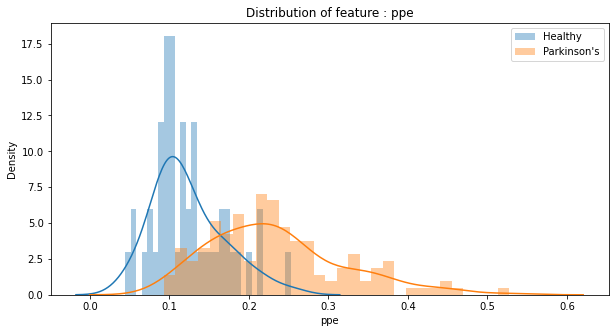

In [ ]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

**From the above we can observe that, patients with ppe (PPE) values greater than 0.16 are more likly to have Parkinson's disease.**
* Lets bucket ppe (PPE) and check w.r.t the different status i.e Healthy or Parkinson's:

status           0           1
ppe                           
0.0-0.1  94.444444    5.555556
0.1-0.2  32.530120   67.469880
0.2-0.3   6.250000   93.750000
0.3-0.4   0.000000  100.000000
0.4-0.5   0.000000  100.000000


Text(0.5, 1.0, 'PD status with different ppe group')

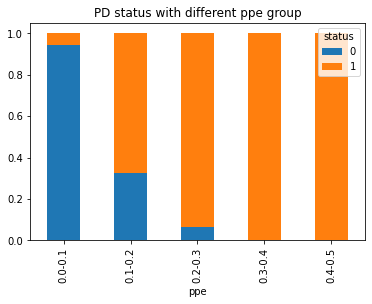

In [ ]:
bins = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]                                         # defining ppe bins,
# defining labels of ppe groups as per bins defined as above
ppe_group = ['0.0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5']
pdData_ppe_bin = pd.cut(pdData[feature],bins,labels=ppe_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to ppe_group_col variable
ppe_group_col = pd.crosstab(pdData_ppe_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(ppe_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
ppe_group_col.div(ppe_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different ppe group")                     # setting title of the figure

- We can find out the following from the above crosstab:
    * **All patient with ppe (PPE) (DFA) group with value more than 0.3 are having Parkinson's disease.**
    * **ppe (PPE) group between 0.2-0.3 having Parkinson's patient with percentage of 93.750 followed by ppe (PPE) group between 0.1-0.2 having Parkinson's patient with percentage of 67.470 .**
    * **ppe (PPE) group between 0.0-0.1 having very less Parkinson's patient with percentage of 5.556 .**
    <br><br>
- Let's check outliers for the attribute :

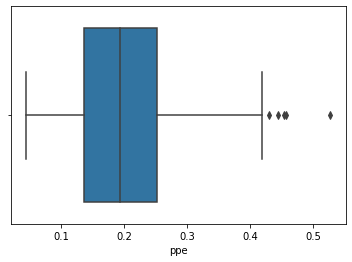

In [ ]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

**In the 'ppe' attribute some outliers are present, let's check for the same :**

In [ ]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature ppe : Mean = 0.206552, Median = 0.194052 and Inter-Quartile-Range (IQR) = 0.115529

*****************************************************************************************************************************
There are 5 outliers (2.564 % of the data points) in ppe feature and the values are [0.430788, 0.444774, 0.457533, 0.527367, 0.454721]
*****************************************************************************************************************************


* Now will check if any outliers present for different target attributes i.e 'status'

<Axes: xlabel='status', ylabel='ppe'>

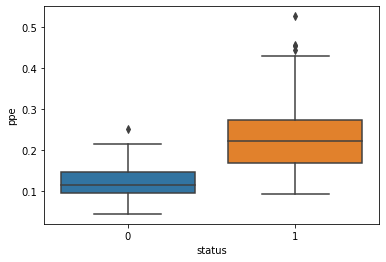

In [ ]:
sns.boxplot(x=pdData['status'],y=pdData[feature]) 

**From above, it is observed that for 'ppe' attribute patients with Parkinson's disease have more outliers than Healthy patients.**

#### W. 'status' attribute : (Health status of the subject (one) - Parkinson's, (zero) - healthy) 

<Figure size 720x360 with 0 Axes>

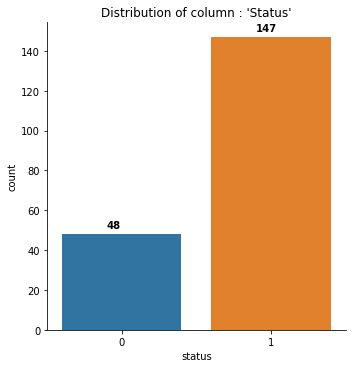

In [ ]:
plt.figure(figsize=(10,5))                                 # setting figure size with width = 10 and height = 5
# seaborn count catplot to examine distribution of the status
ax = sns.catplot(x='status', kind="count", data=pdData)
plt.title("Distribution of column : 'Status'")      # setting title of the figure
y = []                                                     # creating a null or empty array
for val in range(pdData.status.nunique()):        # looping for number of unique values in the status
    # appending count of each unique values from status to array y
    y.append(pdData.groupby(pdData.status,sort=False)['status'].count()[val])
for i, v in enumerate(y):                                  # looping count of each unique value in the status
    # including count of each unique values in the plot 
    plt.annotate(str(v), xy=(i,float(v)), xytext=(i-0.1, v+3), color='black', fontweight='bold')

* Lets check the percentage and plot a pie chart to show :

Text(0.5, 1.0, "Distribution of column : 'status'")

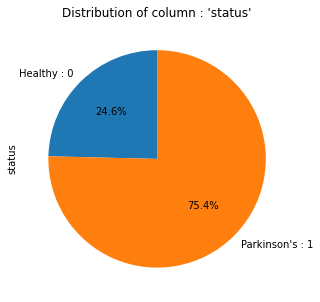

In [ ]:
plt.figure(figsize=(5,5))                               # setting figure size with width = 10 and height = 5
# seaborn pie chart to examine distribution of the status
pdData.groupby(['status']).status.count().plot(kind='pie',labels=['Healthy : 0','Parkinson\'s : 1'],
                                                               startangle=90, autopct='%1.1f%%')
plt.title("Distribution of column : 'status'")   # setting title of the figure

**From above we can see out of 195 patients, 48 patients (24.6 %) are healthy and 147 patients (75.4%) patients are having Parkinson's disease.**

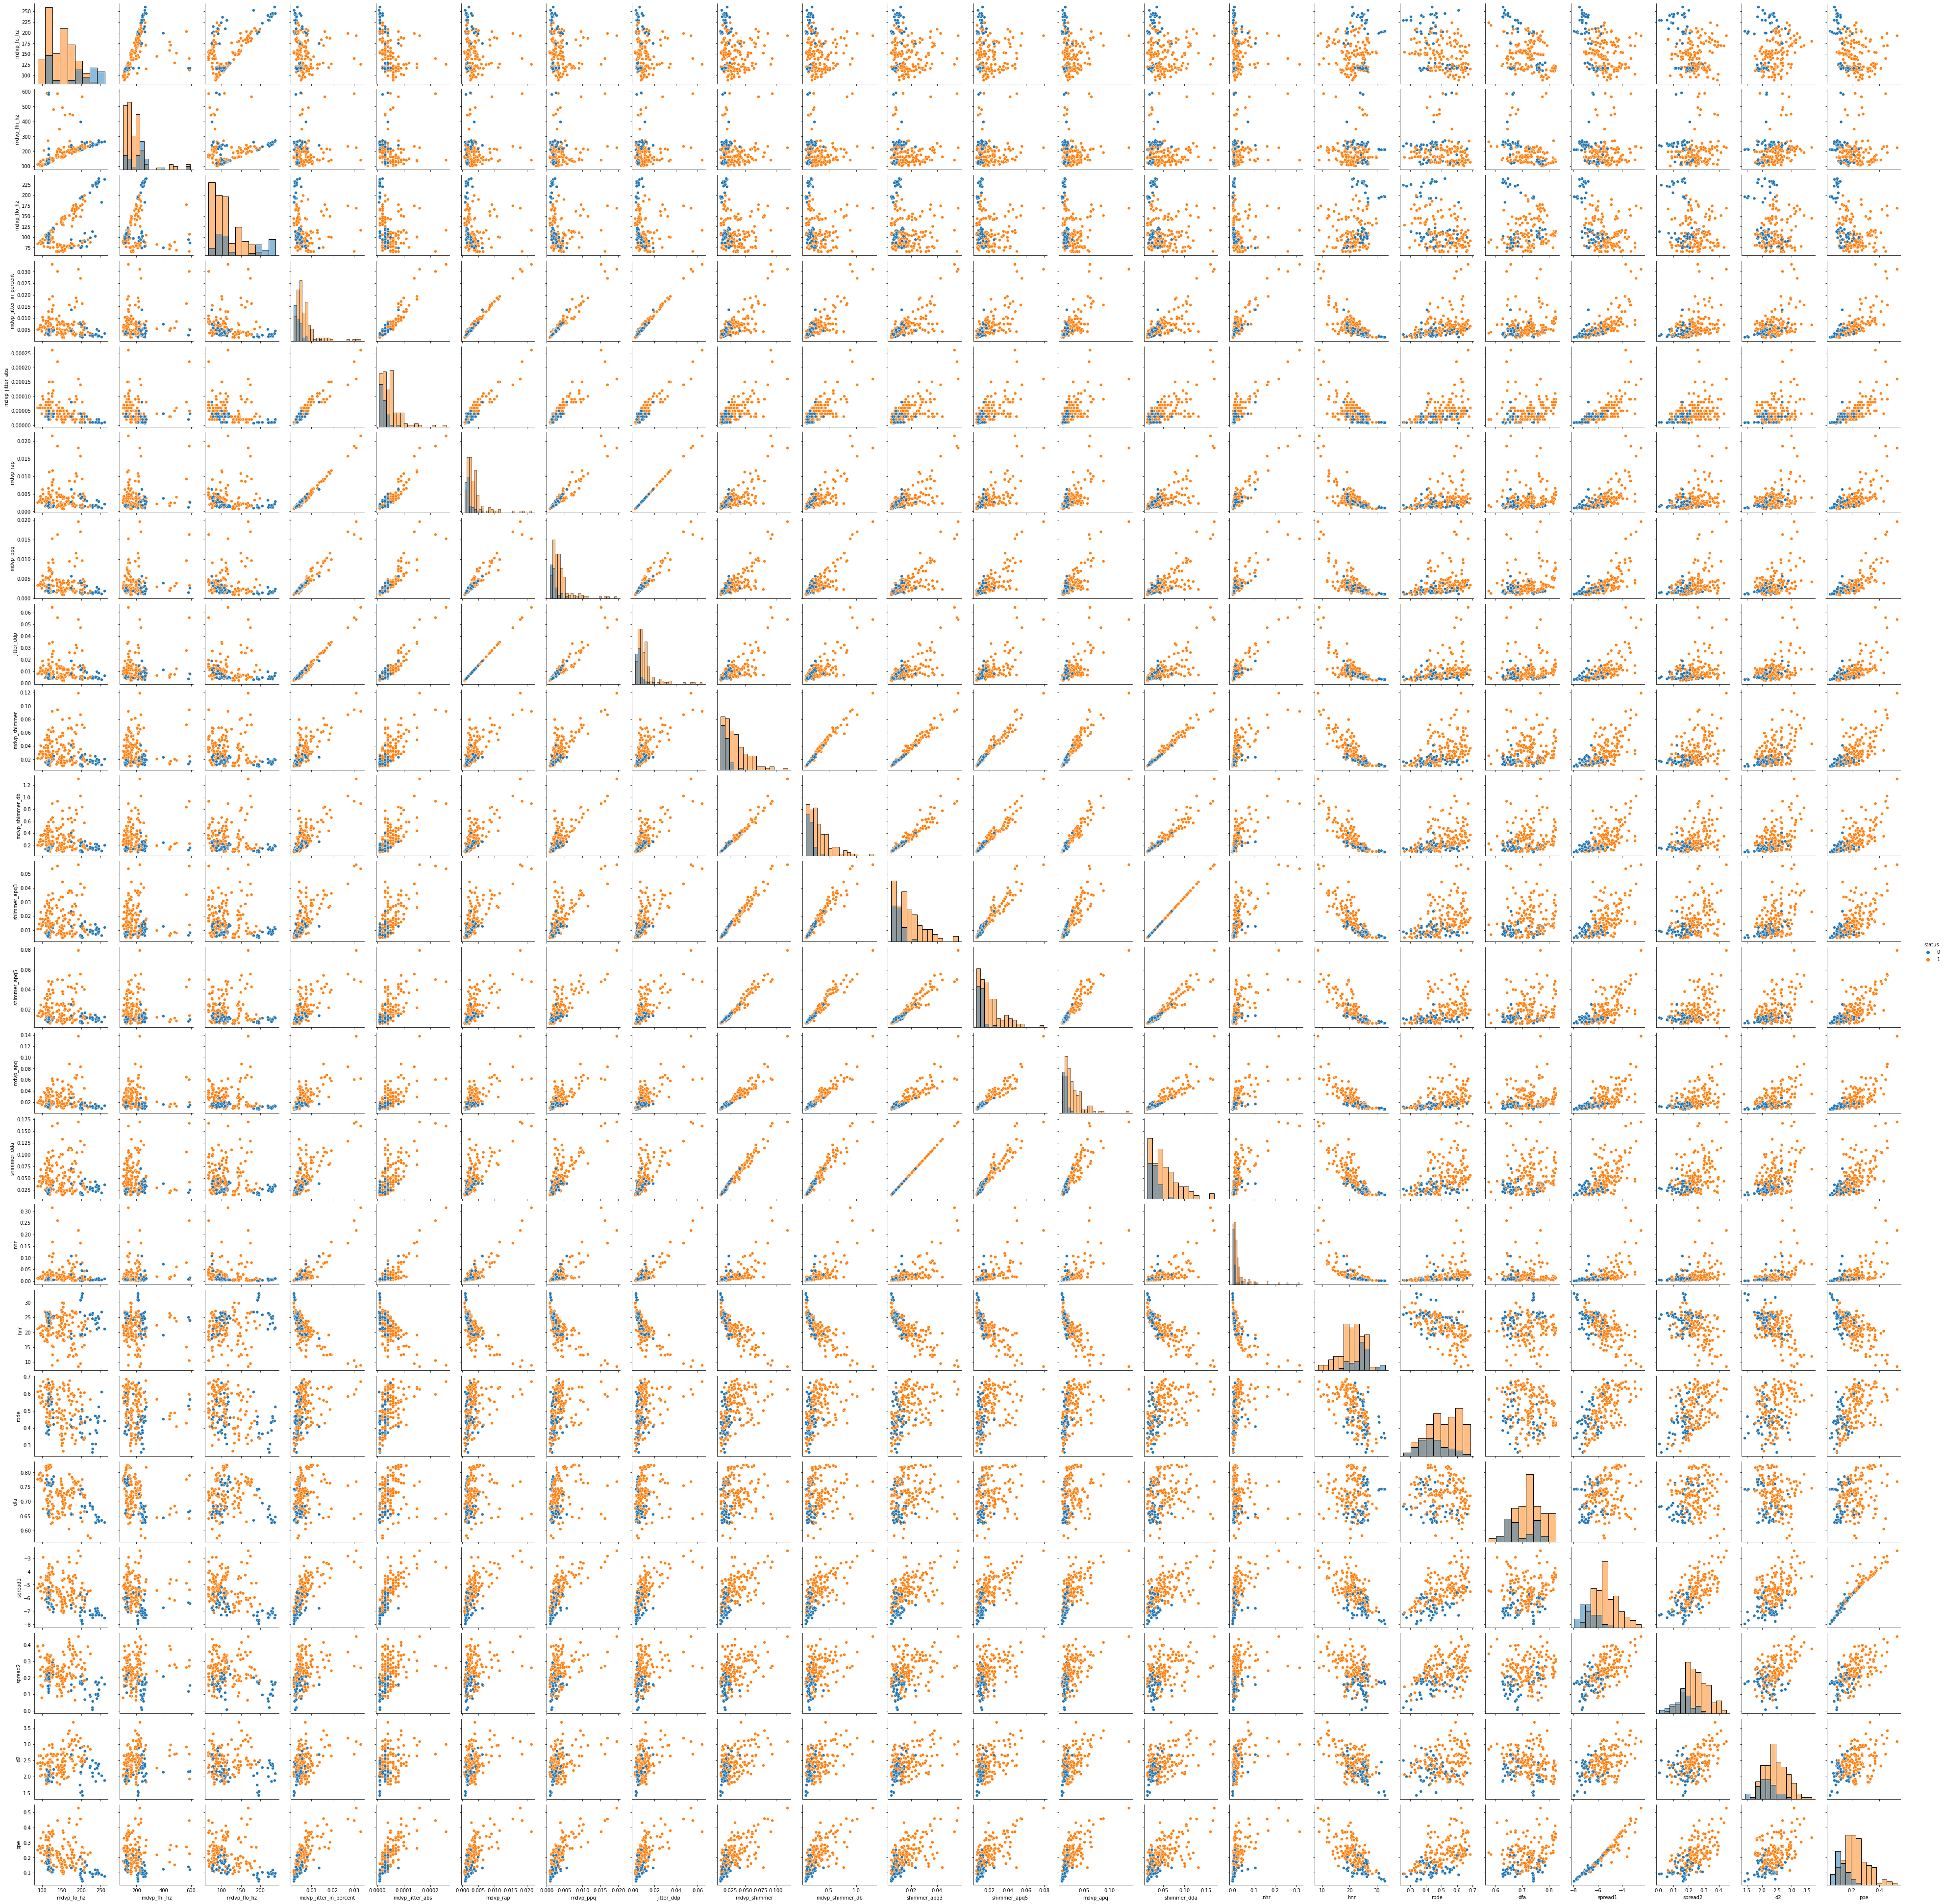

In [ ]:
sns.pairplot(pdData,hue='status',diag_kind='hist')

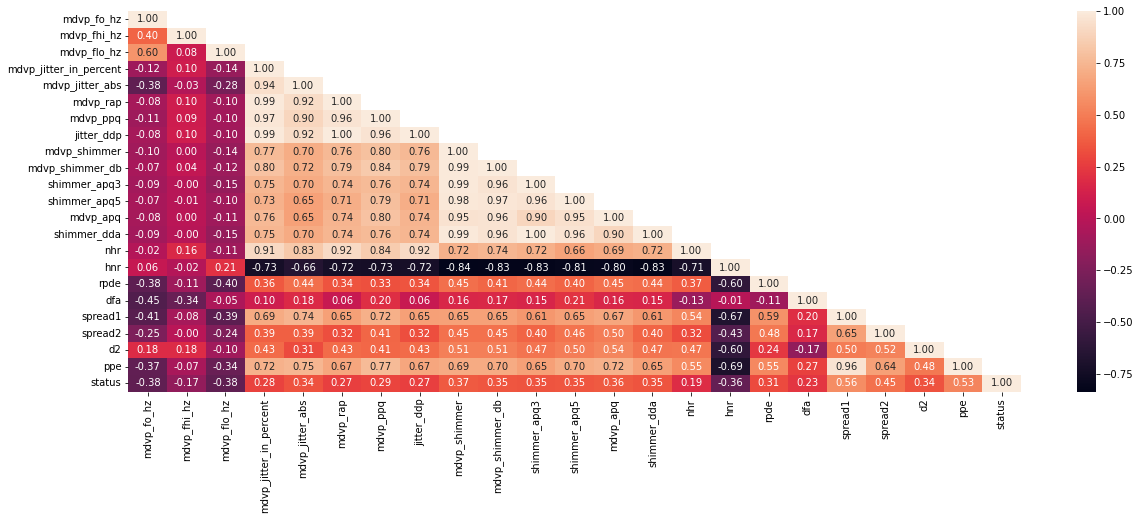

In [ ]:
plt.figure(figsize=(20,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(pdData.corr())
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(pdData.corr(),mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)

**We can observe from the above pairplot and heatmap of correlation of different attributes:**
* **mdvp_jitter_in_percent (MDVP:Jitter(%)) have high correlation with mdvp_jitter_abs (MDVP:Jitter(Abs) ), mdvp_rap (MDVP:RAP), mdvp_ppq (MDVP:PPQ), jitter_ddp (Jitter:DDP) and nhr (NHR).**
* **mdvp_jitter_abs (MDVP:Jitter(Abs) have high correlation with mdvp_rap (MDVP:RAP), mdvp_ppq (MDVP:PPQ), jitter_ddp (Jitter:DDP).**
* **mdvp_rap (MDVP:RAP) have high correlation with mdvp_ppq (MDVP:PPQ), jitter_ddp (Jitter:DDP), nhr (NHR).**
* **mdvp_ppq (MDVP:PPQ) have high correlation with jitter_ddp (Jitter:DDP).**
* **jitter_ddp (Jitter:DDP) have high correlation with nhr (NHR).**
* **mdvp_shimmer (MDVP:Shimmer) have high correlation with mdvp_shimmer_db (MDVP:Shimmer(dB)), shimmer_apq3 (Shimmer:APQ3), shimmer_apq5 (Shimmer:APQ5), mdvp_apq (MDVP:APQ), shimmer_dda (Shimmer:DDA).**
* **mdvp_shimmer_db (MDVP:Shimmer(dB)) have high correlation with shimmer_apq3 (Shimmer:APQ3), shimmer_apq5 (Shimmer:APQ5), mdvp_apq (MDVP:APQ), shimmer_dda (Shimmer:DDA).**
* **shimmer_apq3 (Shimmer:APQ3) have high correlation with shimmer_apq5 (Shimmer:APQ5), mdvp_apq (MDVP:APQ), shimmer_dda (Shimmer:DDA).**
* **shimmer_apq5 (Shimmer:APQ5) have high correlation with mdvp_apq (MDVP:APQ), shimmer_dda (Shimmer:DDA).**
* **mdvp_apq (MDVP:APQ) have high correlation with shimmer_dda (Shimmer:DDA).**
* **spread1 have high correlation with ppe (PPE).**

### 4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test)

In [ ]:
#Split the data into training and test set in the ratio of 70:30 respectively
X = pdData.drop(['status'],axis=1)
y = pdData['status']

# split data into train subset and test subset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

# checking the dimensions of the train & test subset
# printing dimension of train set
print(X_train.shape)
# printing dimension of test set
print(X_test.shape)

(136, 23)
(59, 23)


### 5. Prepare the data for training - Scale the data if necessary, get rid of missing values 


* **As we have seen earlier, there are no missing values in the dataset**
* **As from the earlier correlation heatmap of different attributes we found that mdvp_jitter_in_percent (MDVP:Jitter(%)) have high correlation with mdvp_jitter_abs (MDVP:Jitter(Abs) ), mdvp_rap (MDVP:RAP), mdvp_ppq (MDVP:PPQ), jitter_ddq (Jitter:DDQ) and nhr (NHR). So, in this case we will drop mdvp_jitter_in_percent (MDVP:Jitter(%)).**

In [ ]:
X_train.drop(['mdvp_jitter_in_percent'],axis=1,inplace=True)
X_test.drop(['mdvp_jitter_in_percent'],axis=1,inplace=True)

* **Also from the earlier correlation heatmap of different attributes we found that mdvp_shimmer (MDVP:Shimmer) have high correlation with mdvp_shimmer_db (MDVP:Shimmer(dB)), shimmer_apq3 (Shimmer:APQ3), shimmer_apq5 (Shimmer:APQ5), mdvp_apq (MDVP:APQ), shimmer_dda (Shimmer:DDA). So, in this case we will drop mdvp_shimmer (MDVP:Shimmer).**

In [ ]:
X_train.drop(['mdvp_shimmer'],axis=1,inplace=True)
X_test.drop(['mdvp_shimmer'],axis=1,inplace=True)

* **Also we will drop hnr (HNR).**

In [ ]:
X_train.drop(['hnr'],axis=1,inplace=True)
X_test.drop(['hnr'],axis=1,inplace=True)

In [ ]:
# re checking the dimensions of the train & test subset after dropping several columns from the subsets
# printing dimension of train set
print(X_train.shape)
# printing dimension of test set
print(X_test.shape)

(136, 20)
(59, 20)


In [ ]:
X_train

mdvp_fo_hz  mdvp_fhi_hz  mdvp_flo_hz  mdvp_jitter_abs  mdvp_rap  \
102     139.224      586.567       66.157          0.00022   0.01854   
42      237.226      247.326      225.227          0.00001   0.00169   
78       95.385      102.145       90.264          0.00006   0.00331   
35      201.464      210.565      195.708          0.00001   0.00105   
46      245.510      262.090      231.848          0.00001   0.00127   
..          ...          ...          ...              ...       ...   
72      120.080      139.710      111.208          0.00003   0.00180   
8        95.730      132.068       91.754          0.00006   0.00293   
71      136.358      176.595       65.750          0.00007   0.00534   
134     106.516      112.777       93.105          0.00006   0.00291   
135     110.453      127.611      105.554          0.00004   0.00244   

     mdvp_ppq  jitter_ddp  mdvp_shimmer_db  shimmer_apq3  shimmer_apq5  \
102   0.01628     0.05563            0.930       0.05551       0.05005   
42    0.00182     0.00507            0.164       0.01035       0.01024   
78    0.00332     0.00994            0.263       0.01803       0.01886   
35    0.00115     0.00314            0.107       0.00586       0.00760   
46    0.00148     0.00380            0.141       0.00906       0.00977   
..        ...         ...              ...           ...           ...   
72    0.00220     0.00540            0.152       0.00974       0.00925   
8     0.00332     0.00880            0.191       0.01073       0.01277   
71    0.00478     0.01601            0.483       0.02749       0.02466   
134   0.00319     0.00873            0.441       0.02683       0.03112   
135   0.00315     0.00731            0.379       0.02229       0.02592   

     mdvp_apq  shimmer_dda      nhr      rpde       dfa   spread1   spread2  \
102   0.06023      0.16654  0.25930  0.596362  0.641418 -3.269487  0.270641   
42    0.01133      0.03104  0.00740  0.305062  0.654172 -7.310550  0.098648   
78    0.02455      0.05408  0.01062  0.644954  0.779612 -5.115212  0.249494   
35    0.00957      0.01758  0.00135  0.344252  0.742737 -7.777685  0.170183   
46    0.01149      0.02719  0.00476  0.467489  0.631653 -7.156076  0.127642   
..        ...          ...      ...       ...       ...       ...       ...   
72    0.01345      0.02921  0.00442  0.495954  0.762959 -5.791820  0.329066   
8     0.01717      0.03218  0.01070  0.615551  0.773587 -5.498678  0.327769   
71    0.03736      0.08247  0.03361  0.543299  0.733232 -5.207985  0.224852   
134   0.03651      0.08050  0.03031  0.637814  0.744064 -5.301321  0.320385   
135   0.03316      0.06688  0.02529  0.653427  0.706687 -5.333619  0.322044   

           d2       ppe  
102  2.690917  0.444774  
42   2.416838  0.095032  
78   2.017753  0.260015  
35   2.447064  0.057610  
46   2.392122  0.097336  
..        ...       ...  
72   2.205024  0.188180  
8    2.322511  0.231571  
71   2.642276  0.242981  
134  2.375138  0.243080  
135  2.631793  0.228319  

[136 rows x 19 columns]

In [ ]:
# X_train=X_train.drop(['name'],axis=1,inplace=True)
X_test.drop(['name'],axis=1,inplace=True)


In [ ]:
# # Let us scale train as well as test data using StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### 6. Train at least 3 standard classification algorithms - Logistic Regression, Naive Bayes’, SVM, k-NN etc, and note down their accuracies on the test data 

### A. Logistic Regression:

In [ ]:
# Train and Fit model
lr = LogisticRegression(random_state=0)
lr.fit(X_train_scaled, y_train)

#predict status for X_test_scaled dataset 
lr_y_pred = lr.predict(X_test_scaled)

# Confusion Matrix for the Logistic Regression Model
print("Confusion Matrix : Logistic Regression")
print(confusion_matrix(y_test,lr_y_pred))

# Classification Report for the Logistic Regression Model
classRep = classification_report(y_test, lr_y_pred, digits=2)
print(classRep)

Confusion Matrix : Logistic Regression
[[ 9  4]
 [ 4 42]]
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        13
           1       0.91      0.91      0.91        46

    accuracy                           0.86        59
   macro avg       0.80      0.80      0.80        59
weighted avg       0.86      0.86      0.86        59



**From the above Logistic Regression Model, we can find out the following details:**
* **Accuracy of the model:- 86%**
* **Re-call of the model:- 91%**
* **Precision of the model:- 91%**
* **F1-Score of the model:- 91%**

### B. K-nearest neighbors:

**First let's find out the value of neighbors.**

In [ ]:
# creating odd list of K for KNN
myList = list(range(3,40,2))

# creating empty list for F1 scores od different value of K
f1ScoreList = []

# perform accuracy metrics for values from 3,5....29
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    # predict the response
    y_pred = knn.predict(X_test_scaled)
    # evaluate F1 Score
    f1Score = f1_score(y_test, y_pred)
    f1ScoreList.append(f1Score)

# changing to misclassification error
MSE = [1 - x for x in f1ScoreList]

# determining best k
bestk = myList[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % bestk)

The optimal number of neighbors is 29


In [ ]:
# instantiate learning model (k = 29)
knn = KNeighborsClassifier(n_neighbors = 29, weights = 'uniform', metric='euclidean')

# fitting the model
knn.fit(X_train_scaled, y_train)

# predict the response
knn_y_pred = knn.predict(X_test_scaled)

# Confusion Matrix for the K-nearest neighbors Model
print("Confusion Matrix : K-nearest neighbors")
print(confusion_matrix(y_test,knn_y_pred))

# Classification Report for the K-nearest neighbors Model
classRep = classification_report(y_test, knn_y_pred, digits=2)
print(classRep)

Confusion Matrix : K-nearest neighbors
[[ 8  5]
 [ 0 46]]
              precision    recall  f1-score   support

           0       1.00      0.62      0.76        13
           1       0.90      1.00      0.95        46

    accuracy                           0.92        59
   macro avg       0.95      0.81      0.86        59
weighted avg       0.92      0.92      0.91        59



**From the above K-nearest neighbors Model, we can find out the following details:**
* **Accuracy of the model:- 92%**
* **Re-call of the model:- 100%**
* **Precision of the model:- 90%**
* **F1-Score of the model:- 95%**

### C. SVM (Support Vector Machine):

In [ ]:
svm = SVC(gamma=0.05, C=70,random_state=47)
svm.fit(X_train_scaled , y_train)

# predict the response
svm_y_pred = svm.predict(X_test_scaled)

# Confusion Matrix for the Support Vector Machine Model
print("Confusion Matrix : Support Vector Machine")
print(confusion_matrix(y_test,svm_y_pred))

# Classification Report for the Support Vector Machine Model
classRep = classification_report(y_test, svm_y_pred, digits=2)
print(classRep)

Confusion Matrix : Support Vector Machine
[[10  3]
 [ 0 46]]
              precision    recall  f1-score   support

           0       1.00      0.77      0.87        13
           1       0.94      1.00      0.97        46

    accuracy                           0.95        59
   macro avg       0.97      0.88      0.92        59
weighted avg       0.95      0.95      0.95        59



**From the above Support Vector Machine Model, we can find out the following details:**
* **Accuracy of the model:- 95%**
* **Re-call of the model:- 100%**
* **Precision of the model:- 94%**
* **F1-Score of the model:- 97%**

#### Determining which standard model performed better

In [ ]:
#Using K fold to check how the above algorighms varies throughout the dataset with 10 different subset of equal bins
models = []
models.append(('Logistic Regression', LogisticRegression(random_state=47)))
models.append(('K-NN', KNeighborsClassifier(n_neighbors = 29, weights = 'uniform', metric='euclidean')))
models.append(('SVM', SVC(gamma=0.05, C=70,random_state=47)))

# evaluate each model
results = []
names = []
scoring = 'f1'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("\033[1m{0}\033[0m model have \033[1mmean F1-Score\033[0m of {1} and \033[1mSD F1-Score\033[0m of {2}".format(name, cv_results.mean(), cv_results.std()))

Logistic Regression model have mean F1-Score of 0.8761869507528411 and SD F1-Score of 0.0820031295627062
K-NN model have mean F1-Score of 0.8699922830792396 and SD F1-Score of 0.08990515256323876
SVM model have mean F1-Score of 0.9376985398278306 and SD F1-Score of 0.05038218737307737


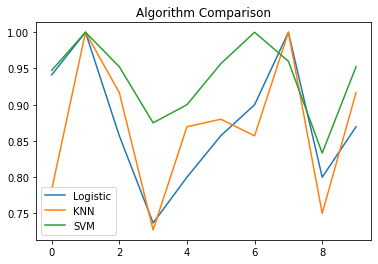

In [ ]:
plt.title('Algorithm Comparison')
plt.plot(results[0],label='Logistic')
plt.plot(results[1],label='KNN')
plt.plot(results[2],label='SVM')
plt.legend()

**From the above comparision of different algorithms (Logistic Regression, K-nearest neighbors and Support Vector Machine) we can conclude that SVM (Support Vector Machine) performed slightly better than other algorithms.**


### 7. Train a meta-classifier and note the accuracy on test data 

* **STACKING:**

In [ ]:
# defining level hetrogenious model
level0 = list()
level0.append(('lr', LogisticRegression(random_state=47)))
level0.append(('knn', KNeighborsClassifier(n_neighbors = 29, weights = 'uniform', metric='euclidean')))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC(gamma=0.05, C=70,random_state=47)))
level0.append(('bayes', GaussianNB()))

# define meta learner model
level1 = SVC(gamma=0.05, C=3,random_state=47)

# define the stacking ensemble with cross validation of 5
Stack_model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

# predict the response
Stack_model.fit(X_train_scaled, y_train)
prediction_Stack = Stack_model.predict(X_test_scaled)

# Confusion Matrix for the Stacking Model
print("Confusion Matrix : Stacking")
print(confusion_matrix(y_test,prediction_Stack))

# Classification Report for the Stacking Model
print(classification_report(y_test, prediction_Stack, digits=2))

Confusion Matrix : Stacking
[[10  3]
 [ 0 46]]
              precision    recall  f1-score   support

           0       1.00      0.77      0.87        13
           1       0.94      1.00      0.97        46

    accuracy                           0.95        59
   macro avg       0.97      0.88      0.92        59
weighted avg       0.95      0.95      0.95        59



#### AUC-ROC for stacking

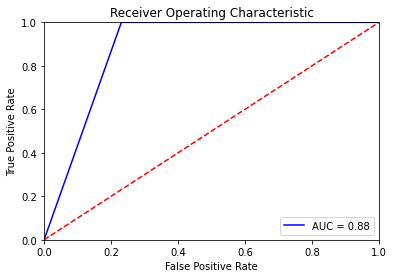

In [ ]:
#determining false positive rate and True positive rate, threshold
fpr, tpr, threshold = metrics.roc_curve(y_test, prediction_Stack)
roc_auc_stack = metrics.auc(fpr, tpr)

#plotting ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_stack)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**From the above Stacked meta classifier Model, we can find out the following details:**
* **Accuracy of the model:- 95%**
* **Re-call of the model:- 100%**
* **Precision of the model:- 94%**
* **F1-Score of the model:- 97%**
* **ROC-AUC : 88%**


### 8.Train  standard Ensemble model - Random forest, Bagging, Boosting etc, and note the accuracy 
**A. Random Forest**

In [ ]:
#creating model of Random Forest
RandomForest = RandomForestClassifier(n_estimators = 100,criterion='entropy',max_features=10,random_state=47)
RandomForest = RandomForest.fit(X_train_scaled, y_train)

# predict the response
RandomForest_pred = RandomForest.predict(X_test_scaled)

# Confusion Matrix for the Random Forest Model
print("Confusion Matrix : Random Forest")
print(confusion_matrix(y_test,RandomForest_pred))

# Classification Report for the Randome Forest Model
print(classification_report(y_test, RandomForest_pred, digits=2))

Confusion Matrix : Random Forest
[[ 9  4]
 [ 1 45]]
              precision    recall  f1-score   support

           0       0.90      0.69      0.78        13
           1       0.92      0.98      0.95        46

    accuracy                           0.92        59
   macro avg       0.91      0.84      0.86        59
weighted avg       0.91      0.92      0.91        59



#### AUC-ROC for Random Forest

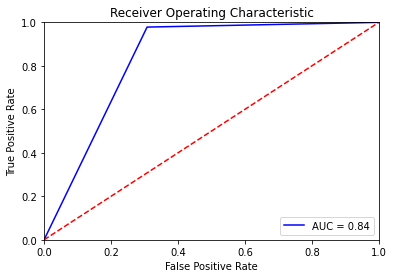

In [ ]:
#determining false positive rate and True positive rate, threshold
fpr, tpr, threshold = metrics.roc_curve(y_test, RandomForest_pred)
roc_auc_rf = metrics.auc(fpr, tpr)

#plotting ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**From the above Random Forest Model, we can find out the following details:**
* **Accuracy of the model:- 92%**
* **Re-call of the model:- 98%**
* **Precision of the model:- 92%**
* **F1-Score of the model:- 95%**
* **ROC-AUC : 84%**


In [ ]:
# Lets check features importance
feature_imp = pd.Series(RandomForest.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

ppe                0.212646
spread1            0.181815
mdvp_fo_hz         0.078539
mdvp_apq           0.066849
mdvp_fhi_hz        0.053630
nhr                0.048251
jitter_ddp         0.044719
spread2            0.044320
mdvp_rap           0.041004
mdvp_flo_hz        0.036010
rpde               0.029126
dfa                0.028516
mdvp_jitter_abs    0.028306
d2                 0.025957
shimmer_dda        0.022860
mdvp_ppq           0.020985
shimmer_apq3       0.012780
mdvp_shimmer_db    0.012384
shimmer_apq5       0.011302
dtype: float64

Text(0, 0.5, 'Features')

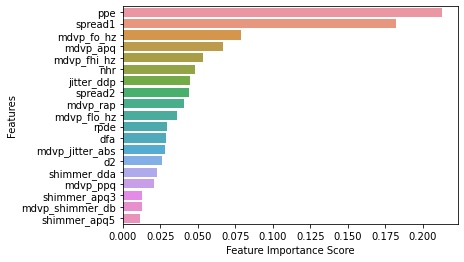

In [ ]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

**B. Adaptive Boosting**

In [ ]:
#creating model of Adaptive Boosting
AdBs = AdaBoostClassifier( n_estimators= 50)
AdBs  = AdBs.fit(X_train_scaled, y_train)

# predict the response
AdBs_y_pred = AdBs.predict(X_test_scaled)

# Confusion Matrix for the Adaptive Boosting Model
print("Confusion Matrix : Adaptive Boosting")
print(confusion_matrix(y_test,AdBs_y_pred))

# Classification Report for the Adaptive Boosting Model
print(classification_report(y_test, AdBs_y_pred, digits=2))

Confusion Matrix : Adaptive Boosting
[[ 9  4]
 [ 2 44]]
              precision    recall  f1-score   support

           0       0.82      0.69      0.75        13
           1       0.92      0.96      0.94        46

    accuracy                           0.90        59
   macro avg       0.87      0.82      0.84        59
weighted avg       0.89      0.90      0.90        59



#### AUC-ROC for AdaBoost

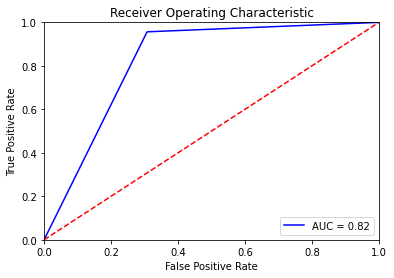

In [ ]:
#determining false positive rate and True positive rate, threshold
fpr, tpr, threshold = metrics.roc_curve(y_test, AdBs_y_pred)
roc_auc_ada = metrics.auc(fpr, tpr)

#plotting ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_ada)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**From the above Adaptive Boosting Model, we can find out the following details:**
* **Accuracy of the model:- 90%**
* **Re-call of the model:- 96%**
* **Precision of the model:- 92%**
* **F1-Score of the model:- 94%**
* **ROC-AUC : 82%**


### 9. Compare all the models and pick the best one among them 

In [ ]:
#Using K fold to check how the various algorighms varies throughout the dataset with 10 different subset of equal bins
models = []
models.append(('Logistic Regression', LogisticRegression(random_state=47)))
models.append(('K-NN', KNeighborsClassifier(n_neighbors = 29, weights = 'uniform', metric='euclidean')))
models.append(('SVM', SVC(gamma=0.05, C=70,random_state=47)))
models.append(('Stacking', StackingClassifier(estimators=level0, final_estimator=level1, cv=5)))
models.append(('Random Forest', RandomForestClassifier(n_estimators = 100,criterion='entropy',max_features=10,random_state=47)))
models.append(('Adaptive Boosting', AdaBoostClassifier( n_estimators= 50)))

# evaluate each model with scoring method accuracy
print("*"*125)
print("Accuracy scoring of the Models")
print("*"*125)
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("\033[1m{0}\033[0m model have \033[1mmean Accuracy\033[0m of {1} and \033[1mSD Accuracy\033[0m of {2}"
          .format(name, round(cv_results.mean(),2), round(cv_results.std(),2))) 


print()
print("*"*125)
print("F1 scoring of the Models")
print("*"*125)

# evaluate each model with scoring method f1
results = []
names = []
scoring = 'f1'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("\033[1m{0}\033[0m model have \033[1mmean F1-Score\033[0m of {1} and \033[1mSD F1-Score\033[0m of {2}"
          .format(name, round(cv_results.mean(),2), round(cv_results.std(),2)))    

*****************************************************************************************************************************
Accuracy scoring of the Models
*****************************************************************************************************************************
Logistic Regression model have mean Accuracy of 0.82 and SD Accuracy of 0.11
K-NN model have mean Accuracy of 0.8 and SD Accuracy of 0.13
SVM model have mean Accuracy of 0.92 and SD Accuracy of 0.05
Stacking model have mean Accuracy of 0.93 and SD Accuracy of 0.05
Random Forest model have mean Accuracy of 0.9 and SD Accuracy of 0.1
Adaptive Boosting model have mean Accuracy of 0.88 and SD Accuracy of 0.09

*****************************************************************************************************************************
F1 scoring of the Models
*****************************************************************************************************************************
Logistic Regression model have

**We can conclude from the above Accuracy and F1 scoring method that, Stacking Model performs better than other models.**
* **Stacking Model have mean Accuracy of 93% with standard deviation of 5% .**
* **And, Stacking Model have mean F1-Score of 94% with standard deviation of 5% .**